# Анализ пользовательских предпочтений и активности,   поведения пользователей сервиса  Яндекс.Афиша

## Цель проекта

выявить инсайты об изменении пользовательских предпочтений и популярности событий осенью 2024 года, для дальнешего развития работы сервиса.

## Задачи проекта:


1. Проведение предварительной обработки данных: выявление и устранение основных аномалий, обработка пропущенных значений и удаление дубликатов.
2. Исследование распределения заказов по различным сегментам потребителей и изучение их изменений в зависимости от сезона.
3. Анализ уровня активности пользователей сервиса в осенний период.
4. Изучение особенностей организации и востребованности отдельных событий и партнеров платформы.
5. Статистическое тестирование гипотез, связанных с активностью пользователей мобильных и стационарных устройств.
6. Сформировать на основании результатов тестов основные выводы и рекомендации по его улучшению.


 ## Описание данных 
 
Для реализации данного проекта  используются данные о бронировании билетов на сервисе Яндекс Афиша за период **с 1 июня по 31 октября 2024 года**. Данные размещены в двух датасетах  `final_tickets_orders_df.csv` и `final_tickets_events_df.csv`.

В датасете `final_tickets_orders_df.csv` отражены данные о всех заказах билетов ,которые были совершены покупателями с двух типов устройств -  мобильных и стационарных.

- `order_id` — уникальный идентификатор заказа;
- `user_id` — уникальный идентификатор пользователя;
- `created_dt_msk` — дата создания заказа (московское время);
- `created_ts_msk` — дата и время создания заказа (московское время);
- `event_id` — идентификатор мероприятия из таблицы events;
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение 'нет';
- `age_limit` — возрастное ограничение мероприятия;
- `currency_code` — валюта оплаты, например rub для российских рублей;
- `device_type_canonical` — тип устройства, с которого был оформлен заказ, например mobile для мобильных устройств, desktop для стационарных;
- `revenue` — выручка от заказа;
- `service_name` — название билетного оператора;
- `tickets_count` — количество купленных билетов;
- `total` — общая сумма заказа;
- `days_since_prev` - количеством дней с предыдущей покупки для каждого пользователя, если покупки не было, то данные содержат пропуск. 

Второй датасет `final_tickets_events_df.csv` содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия :
- `event_id` — уникальный идентификатор мероприятия;
- `event_name` — название мероприятия. Аналог поля event_name_code из исходной базы данных;
- `event_type_description` — описание типа мероприятия;
- `event_type_main` — основной тип мероприятия: театральная постановка, концерт и так далее;
- `organizers` — организаторы мероприятия;
- `region_name` — название региона;
- `city_name` — название города;
- `venue_id` — уникальный идентификатор площадки;
- `venue_name` — название площадки;
- `venue_address` — адрес площадки.

Часть данных представленных в датасете `final_tickets_orders_df.csv` имеет 2 валюты рубль и тенге, поэтому для корректной интерпритации был сформирован дополнительный датасет `final_tickets_tenge_df.csv`с информацией о курсе тенге к российскому рублю за 2024 год. Значения в рублях представлено для 100 тенге. Датасет содержит такие поля:
- `nominal` — номинал (100 тенге).
- `data` — дата.
- `curs` — курс тенге к рублю.
- `cdx` — обозначение валюты (kzt).

## Содержание проекта 

1. Загрузка данных и знакомство с ними;
2. Предобработка данных и подготовка их к исследованию активности пользователей:
   - проверка пропусков и ошибок в данных;
   - обработка явных и неявных дубликатов;
   - обработка типов данных;
   - создание дополнительных столбцов с информацией для дальнейшей работы.
3. Исследовательский анализ данных активности пользователей:
    -  анализ распределения заказов по сегментам и их сезонные изменения;
    -  исследование осенней активности пользователей;
    -  анализ популярных событий и партнёров.
4. Статистический анализ данных и проверка гипотез активности пользователей мобильных и стационарных устройств:
    - исследование гипотезы "Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств";
    - исследование гипотезы "Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств".
5. Общий вывод и рекомендации

## Загрузка данных и знакомство с ними


Для начала выгрузим все основные библиотеки, которые понадобятся в процессе работы.

In [1]:
!pip install adjustText -q

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from adjustText import adjust_text

from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import mannwhitneyu

Далее выгрузим все нащи датасеты для дальнешего исследования.

In [3]:
try: 
    tickets= pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/Финальный проект/final_tickets_orders_df.csv', sep = ',')
    events= pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/Финальный проект/final_tickets_events_df.csv', sep = ',')
    tenge= pd.read_csv('C:/Users/Ирэн/Documents/Обучение/Data Analis_Яндекс_Практикум/Дата_сеты/Финальный проект/final_tickets_tenge_df.csv', sep = ',')
    
except FileNotFoundError:
    tickets= pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv', sep = ',')
    events= pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv', sep = ',')
    tenge= pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv', sep = ',')

Ознакомимся с данными из всех датасетов.

In [4]:
tickets.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


In [5]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [6]:
events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


In [7]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [8]:
tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


In [9]:
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


### Предварительные выводы по ознакомлению с данными:

- данные представлены в 2х основных датасетах и одном вспомогательный датасет для дальнейшей конвертации валюты;
- предварительное ознакомление с данными в `tickets` показало, что датасет состоит из `14 столбцов` и `290849 строк`, при этом все столбцы кроме days_since_prev не имеют пропусков, при этом пропуски `days_since_prev` можно объяснить тем, что ранее данный покупатель не совершал покупки в сервисе. Стоит отметить, что часть данных имеет не соответствующий информации отражаемой в них, в том числе данные с датой и временем;
- датасет `events` состоит из `11 столбцов` и `22427 строк`, при этом в данных нет пропусков, тип данных соответствует заявленной информации;
- датасет `tenge` является вспомогательным, здесь отражена информация для конвертации валюты. Пропуски отсутствуют, а вот в части типа данных можно скорректировать данные по датам.




 ## Предобработка данных и подготовка их к исследованию активности пользователей

Перед проведением исследования данных нам стоит провести предварительную предобработку для того чтобы снизить недостоверность предоставленной информации.

### Проверка пропусков и ошибок в данных

Для начала соединим `tickets` и `events` в один датафрейм `tickets_events`.

In [10]:
tickets_events = pd.merge(tickets,events, on = 'event_id', how = 'left')

In [11]:
## сформируем копию начального df для того чтобы в дальнешем определить сколько данных было удалено
tickets_events_start = tickets_events.copy() 

In [12]:
tickets_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290849 entries, 0 to 290848
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                290849 non-null  int64  
 1   user_id                 290849 non-null  object 
 2   created_dt_msk          290849 non-null  object 
 3   created_ts_msk          290849 non-null  object 
 4   event_id                290849 non-null  int64  
 5   cinema_circuit          290849 non-null  object 
 6   age_limit               290849 non-null  int64  
 7   currency_code           290849 non-null  object 
 8   device_type_canonical   290849 non-null  object 
 9   revenue                 290849 non-null  float64
 10  service_name            290849 non-null  object 
 11  tickets_count           290849 non-null  int64  
 12  total                   290849 non-null  float64
 13  days_since_prev         268909 non-null  float64
 14  event_name          

Нам необходимо подробнее исследовать данные на пропуски, ошибки и так далее.

In [13]:
tickets_events_miss = tickets_events.isna().sum()
print('Данные о пропущенных значениях')
print(tickets_events_miss)

Данные о пропущенных значениях
order_id                      0
user_id                       0
created_dt_msk                0
created_ts_msk                0
event_id                      0
cinema_circuit                0
age_limit                     0
currency_code                 0
device_type_canonical         0
revenue                       0
service_name                  0
tickets_count                 0
total                         0
days_since_prev           21940
event_name                  238
event_type_description      238
event_type_main             238
organizers                  238
region_name                 238
city_name                   238
city_id                     238
venue_id                    238
venue_name                  238
venue_address               238
dtype: int64


In [14]:
tickets_events_copy = tickets_events.copy()
display(pd.DataFrame(round(tickets_events_copy.isna().mean()*100,2),columns=['NaNs, %']).style.format( '{:.2f}')
        .background_gradient('coolwarm'))

,"NaNs, %"
order_id,0.00
user_id,0.00
created_dt_msk,0.00
created_ts_msk,0.00
event_id,0.00
cinema_circuit,0.00
age_limit,0.00
currency_code,0.00
device_type_canonical,0.00
revenue,0.00


Как и ранее было отмечено в дата сете  есть пропуски в столбце `days_since_prev` в размере `7,54%`, однако, их образование можно объяснить тем, что ранее у данного пользователя не было предыдущей покупки. Стоит отметить, что после соединения 2х датафреймах в присоединенных столбцах образовались пропуски, но их доля не превышает `0,08%`. Это может говорить нам о том, что в датасете `tickets` были загружены данные отсутствующие в `events`. Удалим данные пропуски, а в `days_since_prev` заполним нулями.

In [15]:
tickets_events = tickets_events.dropna(subset=['event_name','event_type_description',
                                               'event_type_main','organizers','region_name',
                                               'city_name','city_id','venue_id', 
                                               'venue_name','venue_address']).reset_index(drop=True)

In [16]:
tickets_events['days_since_prev'] = tickets_events['days_since_prev'].fillna(0)

In [17]:
tickets_events_miss = tickets_events.isna().sum()
print('Данные о пропущенных значениях')
print(tickets_events_miss)

Данные о пропущенных значениях
order_id                  0
user_id                   0
created_dt_msk            0
created_ts_msk            0
event_id                  0
cinema_circuit            0
age_limit                 0
currency_code             0
device_type_canonical     0
revenue                   0
service_name              0
tickets_count             0
total                     0
days_since_prev           0
event_name                0
event_type_description    0
event_type_main           0
organizers                0
region_name               0
city_name                 0
city_id                   0
venue_id                  0
venue_name                0
venue_address             0
dtype: int64


Далее нам необходимо исследовать данные на наличие или отсутствие ошибок для того чтобы избежать в дальнейшем искажения информации, для начала исследуем категориальные переменные в `tickets_events`.

In [18]:
# Исследуем категорию currency_code
print(tickets_events['currency_code'].unique())


['rub' 'kzt']


In [19]:
# Устройство покупки
print(tickets_events['device_type_canonical'].unique())


['mobile' 'desktop']


In [20]:
# Сеть кинотеатра
print(tickets_events['cinema_circuit'].unique())

['нет' 'Другое' 'Киномакс' 'КиноСити' 'Москино' 'ЦентрФильм']


In [21]:
# Возрастные категории
print(tickets_events['age_limit'].unique())

[16  0 18 12  6]


In [22]:
# наименование  билетного оператора
print(tickets_events['service_name'].unique())

['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']


In [23]:
#тип мероприятия
print(tickets_events['event_type_main'].value_counts())

концерты    115276
театр        67321
другое       65867
спорт        21911
стендап      13393
выставки      4854
ёлки          1989
Name: event_type_main, dtype: int64


In [24]:
#тип наименование мероприятий
print(tickets_events['event_name'].value_counts())

9cc55c15-4375-4129-9979-3129688ba1b4    3953
a00e1032-6463-4fdc-a105-fdbb6789b556    2519
0714435e-3b5f-4312-aa36-c3a9d8853ef4    1761
58574140-962c-49a3-af70-b773a05661a3    1749
e252d33a-2394-44b8-b11d-f0709a6f0260    1628
                                        ... 
cc03f6e6-7788-4279-a2b8-3b544b8844de       1
129d9d19-fac5-4341-8a96-ae0049ff41ac       1
1ec0f3e7-18db-4204-8317-8404e98a0ebe       1
5be61270-0ebf-44eb-8dad-c783c52692fa       1
0fd6df8e-49e5-4337-954d-5a4606b1b899       1
Name: event_name, Length: 15248, dtype: int64


In [25]:
##проверка наименования региона
sorted_unique_regions = sorted(tickets_events['region_name'].unique())
print(sorted_unique_regions)

['Белоярская область', 'Берестовский округ', 'Берёзовская область', 'Боровлянский край', 'Верховинская область', 'Верхозёрский край', 'Верхоречная область', 'Ветренский регион', 'Вишнёвский край', 'Глиногорская область', 'Голубевский округ', 'Горицветская область', 'Горноземский регион', 'Горностепной регион', 'Дальнеземская область', 'Дальнезорский край', 'Дубравная область', 'Залесский край', 'Заречная область', 'Зеленоградский округ', 'Златопольский округ', 'Золотоключевской край', 'Зоринский регион', 'Каменевский регион', 'Каменичская область', 'Каменноозёрный край', 'Каменноярский край', 'Каменополянский округ', 'Ключеводский округ', 'Кристаловская область', 'Кристальная область', 'Крутоводская область', 'Крутоводский регион', 'Лесноярский край', 'Лесодальний край', 'Лесополянская область', 'Лесостепной край', 'Лесоярская область', 'Луговая область', 'Лугоградская область', 'Малиновая область', 'Малиновоярский округ', 'Медовская область', 'Миропольская область', 'Нежинская область

In [26]:
#тип наименование города
print(tickets_events['city_name'].unique())

['Глиногорск' 'Озёрск' 'Родниковецк' 'Кристалевск' 'Дальнозолотск'
 'Радужнополье' 'Радужсвет' 'Кумсай' 'Верховино' 'Светополье' 'Кокжар'
 'Каменский' 'Лесоярич' 'Никольянов' 'Речинцево' 'Лесозолотск'
 'Дальнозерск' 'Серебрянка' 'Островецк' 'Родниковец' 'Дальнесветск'
 'Луговаярово' 'Ягодиновка' 'Дальнополин' 'Солчелуг' 'Озёрчане'
 'Серебровино' 'Лесоярово' 'Глинополье' 'Глиноград' 'Дальнесветин'
 'Северополье' 'Теплоозеро' 'Горнодолинск' 'Ордакент' 'Озёрово'
 'Луговинск' 'Лугоград' 'Златопольск' 'Крутовинск' 'Сарыжар' 'Сосновечин'
 'Тихоярск' 'Яблонецк' 'Жаркентай' 'Широковка' 'Синеводов' 'Синеводск'
 'Тихосветск' 'Радужанов' 'Глиногорь' 'Каменосветск' 'Родниковск'
 'Травогород' 'Глинянск' 'Радужинск' 'Поляногорье' 'Дальнолесье'
 'Ручейник' 'Ключеград' 'Ключеводск' 'Поленовино' 'Речичанск'
 'Ключевополье' 'Шаныртау' 'Дальнесоснов' 'Ордасай' 'Теплоозёрск'
 'Чистогорье' 'Ручейный' 'Островярово' 'Ягодинск' 'Поленоозёрово'
 'Акбасты' 'Медовино' 'Каменёвка' 'Рощино' 'Солнечнёвка' 'Верхозол

In [27]:
## проверка организаторов
print(tickets_events['organizers'].unique())

['№3322' '№4850' '№1540' ... '№1161' '№3497' '№1904']


In [28]:
## проверка наименований площадки
tickets_events['venue_name'].unique()


array(['Сценический центр "Деталь" Групп',
       'Музыкальная школа для детей "Аккаунт" Лтд',
       'Училище искусств "Нирвана" Инк', ...,
       'Университет искусств "Прогресс" Групп',
       'Творческая ярмарка "График" Инк', 'Школа музыки "Парадигма" Лтд'],
      dtype=object)

In [29]:
## проверка наименований адреса площадки
print(tickets_events['venue_address'].unique())

['алл. Машиностроителей, д. 19 стр. 6' 'алл. Шмидта, д. 9 стр. 4'
 'алл. Юбилейная, д. 5/6' ... 'ш. Безымянное, д. 6'
 'алл. Тепличная, д. 4/1' 'пр. Сплавный, д. 236 к. 918']


В категориальных данных нет ошибок, отражена информация, соответствующая запросу данных.

Далее исследуем количественные переменные `revenue` и `tickets_count`, при анализе следует учитывать, что у нас в данных представлено 2 валюты рубли и тенге поэтому очень важно предварительно провести исследование данных в разрезе каждой валюты. Однако для начала посмотрим частоту отражения данных в каждой из валют.

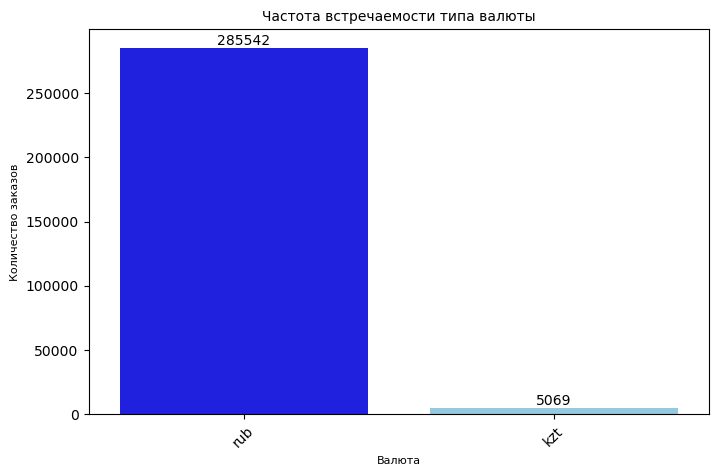

In [30]:
## Диаграмма позволит нам определить частоту представленния в данных в разрезе валют
plt.figure(figsize=(8,5))
sns.countplot(x='currency_code', data=tickets_events,palette=["blue", "skyblue"])

plt.xlabel('Валюта', fontsize=8)
plt.ylabel('Количество заказов', fontsize=8)

# Добавляем заголовок
plt.title('Частота встречаемости типа валюты', fontsize=10)

for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

Как видно из представленных данных, то основная часть заказов сделана в **рублях** в размере `285542` заказа, а в **тенге** `5049` заказа, то есть целевой аудиторией сервиса в основном является российские пользователи, но возможно и часть населения Казахстана, которые пользуются российской валютой.

Cовокупное использование двух разных валют при исследовании количественных значений могут исказить друг друга, то целесообразно провести разделение данных.

In [31]:
df_rub = tickets_events[tickets_events['currency_code']=='rub'].copy()
df_kzt = tickets_events[tickets_events['currency_code']=='kzt'].copy()

In [32]:
df_rub[['revenue','tickets_count']].describe()

,revenue,tickets_count
count,285542.000000,285542.000000
mean,548.013929,2.754159
std,871.750181,1.171575
min,-90.760000,1.000000
25%,114.170000,2.000000
50%,346.630000,3.000000
75%,793.320000,4.000000
max,81174.540000,57.000000


In [33]:
df_kzt[['revenue','tickets_count']].describe()

,revenue,tickets_count
count,5069.000000,5069.000000
mean,4995.206767,2.762872
std,4916.752776,1.115558
min,0.000000,1.000000
25%,518.100000,2.000000
50%,3698.830000,3.000000
75%,7397.660000,4.000000
max,26425.860000,6.000000


По результату выгрузки основных статестических индикаторов мы можем определить:

- высокое максимальное значение и существенный разброс между 75-м перцентилем и максимальным значением указывают на возможное присутствие аномалий или выбросов в данных;
- наличие отрицательных значений в столбце revenue также обращает на себя внимание. Вероятно, это связано с такими случаями, как возвраты денежных средств клиентам или применение промокодов и скидочных акций;

Мы можем предполагать о наличии аномальных значений в `revenue`, так как видно явное отклонение между средним и медианным значением, а также максимальное значение достаточно большое по сравнению с остальными показателями и составляет `26425.86`. Данные по `tickets_count` не имеют значительных разрывов.

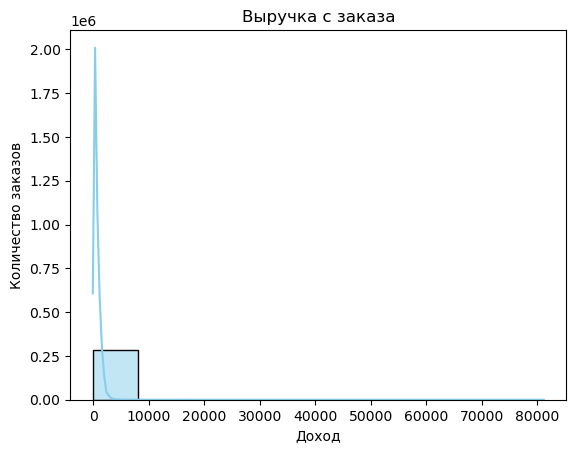

In [34]:
# Диаграмма плотности выручки в рублях
sns.histplot(df_rub['revenue'], kde=True,bins = 10,color = 'skyblue')
plt.title('Выручка с заказа')
plt.xlabel('Доход')
plt.ylabel('Количество заказов')
plt.show()

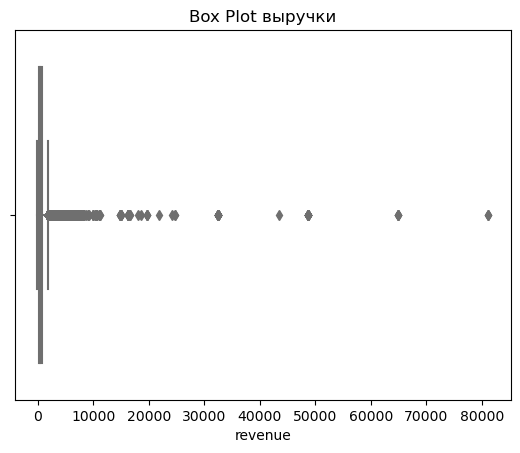

In [35]:
##Диаграмма рассеивания выручки
sns.boxplot(x=df_rub['revenue'],color = 'skyblue')
plt.title('Box Plot выручки')
plt.show()


Как видно, что данные содержит ряд аномальных значений в метрике рублевой выручки. Данные имеют «длинных хвост» после 10 000 рублей на гистограмме и на графике «ящик с усами». Скорее всего - это аномальные значения, так как они выбиваются из общего представления данных. 

Дополним исследование аномалий еще по столбцу `tickets_count`.

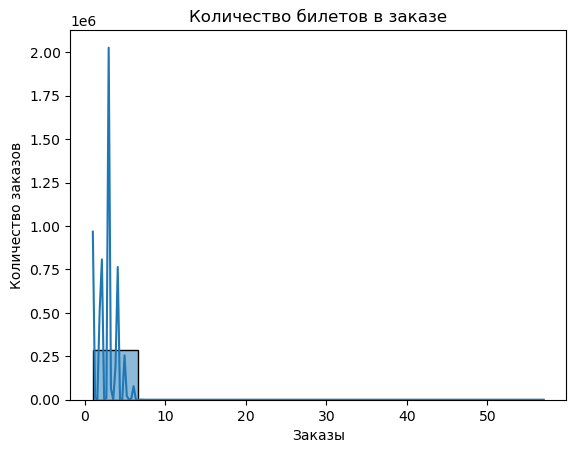

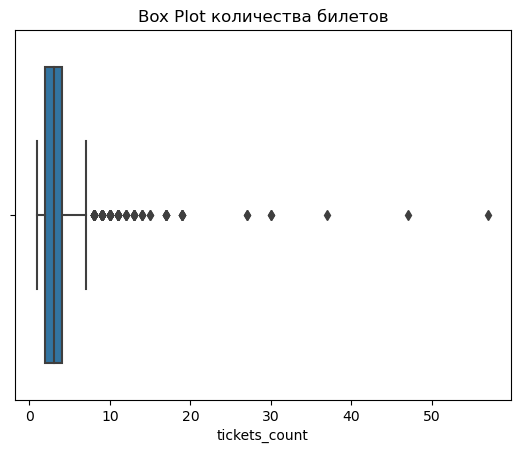

In [36]:
sns.histplot(df_rub['tickets_count'], bins = 10, kde = True)
plt.title('Количество билетов в заказе')
plt.xlabel('Заказы')
plt.ylabel('Количество заказов')
plt.show()

sns.boxplot(x=df_rub['tickets_count'])
plt.title('Box Plot количества билетов')
plt.show()


В столбце `tickets_count` обнаружено большое число аномальных значений, которые ярко видны после отметки 5-6. Есть высокая вероятность, что все значения в столбце `tickets_count` свыше указанного значение - это аномалии.

В связи с этим целесообразно удалить аномалии и для этого будем использовать провести отбор данных по 99-му процентилю.


In [37]:
# Определение порога по 99-му процентилю для revenue и для tickets_count
r_q_99 = df_rub['revenue'].quantile(0.99)
t_q_99 = df_rub['tickets_count'].quantile(0.99)
print(f'99 процентиль для revenue: {r_q_99}')
print(f'99 процентиль для tickets_count: {t_q_99}')

99 процентиль для revenue: 2570.8
99 процентиль для tickets_count: 6.0


In [38]:
##фильтруем данные в зависимости от полученного значения 99 - му процентилю
tickets_rub = df_rub[(df_rub['revenue']<=r_q_99)&(df_rub['tickets_count']<=t_q_99)]

In [39]:
tickets_rub[['revenue','tickets_count']].describe()

,revenue,tickets_count
count,282562.000000,282562.000000
mean,510.561628,2.735127
std,500.828305,1.136176
min,-90.760000,1.000000
25%,112.020000,2.000000
50%,340.490000,3.000000
75%,781.720000,3.000000
max,2570.800000,6.000000


Таким образом,  в результате удаления аномальных значений статистические показатели по `revenue` и `tickets_count` несколько сгладились, но по `revenue` все - равно можно отметить наличие значительно расхождения между средним и медианным значением и есть риск наличия неравномерного распределения данных.

Исследуем данные выраженные в `тенге`.

In [40]:
df_kzt[['revenue','tickets_count']].describe()

,revenue,tickets_count
count,5069.000000,5069.000000
mean,4995.206767,2.762872
std,4916.752776,1.115558
min,0.000000,1.000000
25%,518.100000,2.000000
50%,3698.830000,3.000000
75%,7397.660000,4.000000
max,26425.860000,6.000000


При предварительном анализе данных в тенге, мы можем предполагать о наличии аномальных значений в `revenue`, так как видно явное отклонение между средним и медианным значением, а также максимальное значение достаточно большое по сравнению с остальными показателями и составляет `26425.86`. Показатели по `tickets_count` показывают относительное сопоставление друг с другом и не имеют значительных разрывов. 

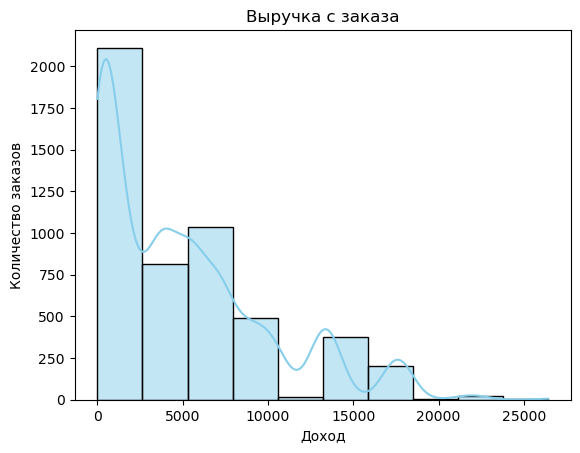

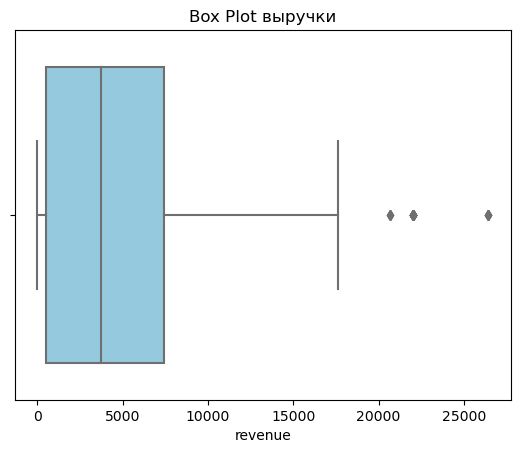

In [41]:
# Диаграмма плотности выручки в тенге
sns.histplot(df_kzt['revenue'], kde=True,bins = 10,color = 'skyblue')
plt.title('Выручка с заказа')
plt.xlabel('Доход')
plt.ylabel('Количество заказов')
plt.show()

##Диаграмма рассеивания выручки
sns.boxplot(x=df_kzt['revenue'],color = 'skyblue')
plt.title('Box Plot выручки')
plt.show()


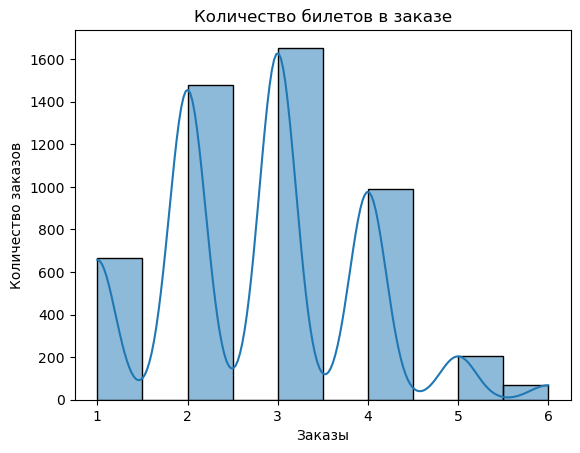

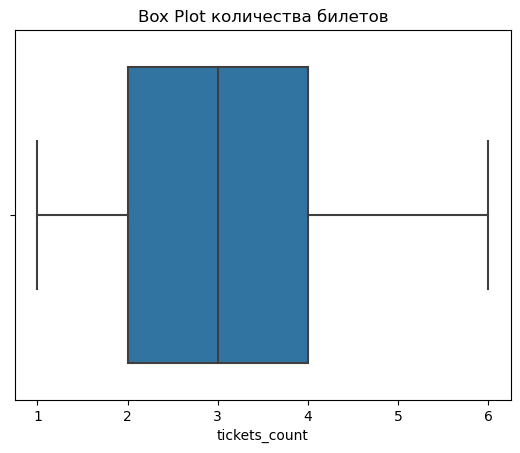

In [42]:
sns.histplot(df_kzt['tickets_count'], bins = 10, kde = True)
plt.title('Количество билетов в заказе')
plt.xlabel('Заказы')
plt.ylabel('Количество заказов')
plt.show()

sns.boxplot(x=df_kzt['tickets_count'])
plt.title('Box Plot количества билетов')
plt.show()


По данным `tickets_count`,  в визуальной интерпретации не наблюдаются выбросы. При исследовании `revenue` мы еще раз убедились в наличии выбросов, в том числе можно наблюдать аномалии после отметки в `17500 тенге`. Поэтому стоит удалить данные и здесь также рассчитаем `99 - процентиль`.

In [43]:
# Определение порога по 99-му процентилю для revenue
q_99 = df_kzt['revenue'].quantile(0.99)
print(f'99 процентиль для revenue: {q_99}')


99 процентиль для revenue: 17617.24


In [44]:
##фильтруем данные в зависимости от полученного значения 99 - му процентилю
tickets_kzt = df_kzt[(df_kzt['revenue']<=q_99)]

In [45]:
tickets_kzt[['revenue','tickets_count']].describe()

,revenue,tickets_count
count,5040.000000,5040.000000
mean,4893.669063,2.748413
std,4742.680176,1.101784
min,0.000000,1.000000
25%,515.350000,2.000000
50%,3698.830000,3.000000
75%,7397.660000,3.000000
max,17617.240000,6.000000


В результате удаления аномальных значений нами получены более адаптивные данные для анализа, в которых снижено влияние аномальных значений.

In [46]:
##объединим датасеты снова в единый 
df_afisha = pd.concat([tickets_rub, tickets_kzt], axis=0).reset_index(drop=True)
df_afisha.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


 ###  Обработка явных и неявных дубликатов

Впервую очедередь стоит исследовать  наличие явных дубликатов.

In [47]:
print(f'Количество явных дубликатов: {df_afisha.duplicated().sum()}')

Количество явных дубликатов: 0


Явных дубликатов нет, однако есть вероятность того,что могут быть неявные дубликаты, которые оказались результатом технической ошибки. 

In [48]:
print(df_afisha.duplicated(subset=['user_id', 'created_dt_msk','created_ts_msk', 'event_id','cinema_circuit',
                                  'age_limit', 'currency_code','device_type_canonical','service_name','tickets_count',
                                  'total','event_name', 'event_type_description', 'event_type_main', 'organizers','region_name',
                                  'city_name', 'venue_id','venue_name','venue_address','days_since_prev']).sum())

31


Проверим действительно ли найденные значения  являются по итогу дубликами.

In [49]:
df_duplicat = df_afisha.loc[df_afisha.duplicated(subset=['user_id', 'created_dt_msk','created_ts_msk', 'event_id','cinema_circuit',
                                  'age_limit', 'currency_code','device_type_canonical','service_name','tickets_count',
                                  'total','event_name', 'event_type_description', 'event_type_main', 'organizers','region_name',
                                  'city_name', 'venue_id','venue_name','venue_address','days_since_prev'], keep = False)]

In [50]:
df_duplicat.head(60)

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
11480,1123983,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,69796237-909b-42a7-bfb5-c1b8574c4c76,спектакль,театр,№1482,Светополянский округ,Глиноград,54.0,4443.0,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50"
11481,1123867,06eb7897f65b433,2024-08-13,2024-08-13 16:31:07,183706,нет,18,rub,mobile,69.82,...,69796237-909b-42a7-bfb5-c1b8574c4c76,спектакль,театр,№1482,Светополянский округ,Глиноград,54.0,4443.0,"Центр культурного наследия ""Объединение"" и пар...","бул. Карбышева, д. 50"
55760,160922,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,выставка,другое,№1810,Яблоневская область,Горяново,11036.0,1656.0,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39"
55763,160893,2564e3703075008,2024-10-30,2024-10-30 10:04:15,589005,нет,6,rub,mobile,11.23,...,bee8d0cc-282b-492e-9ed8-ec0990f43ffd,выставка,другое,№1810,Яблоневская область,Горяново,11036.0,1656.0,"Модная академия ""Пункт"" Лимитед","бул. Гагарина, д. 39"
81668,3363711,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,dcb6fe75-8502-480d-b8a2-6bee187cb7ee,событие,выставки,№5015,Нежинская область,Каменёвка,76.0,3094.0,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2"
81673,3363798,3ee7dc2e115847f,2024-06-25,2024-06-25 07:32:08,277504,нет,6,rub,mobile,59.19,...,dcb6fe75-8502-480d-b8a2-6bee187cb7ee,событие,выставки,№5015,Нежинская область,Каменёвка,76.0,3094.0,"Сообщество художников ""Палитра"" и партнеры","пр. Театральный, д. 161 стр. 2"
144291,2324032,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,88478781-0311-42e3-b0ea-d4d6a171b70a,спорт,спорт,№1503,Чистогорская область,Песчанская,21.0,2155.0,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432"
144295,2323916,7b525118ae656af,2024-10-28,2024-10-28 08:33:04,588203,нет,0,rub,mobile,26.96,...,88478781-0311-42e3-b0ea-d4d6a171b70a,спорт,спорт,№1503,Чистогорская область,Песчанская,21.0,2155.0,"Клуб моделей ""Гармония"" Инк","ул. Прохладная, д. 8 к. 432"
149806,5372628,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"
149809,5372831,7eb4fc207ecc10f,2024-08-23,2024-08-23 14:08:19,298035,нет,6,rub,mobile,126.84,...,09164a56-0fb3-43c7-91d3-8ed22bb3d8ef,событие,другое,№4403,Североярская область,Озёрск,2.0,2795.0,"Клуб исторических реконструкций ""Логос"" и парт...","пр. Пушкина, д. 8/6 к. 482"


Таким образом, мы подтвердили, что данные значения являются неявными дубликатами, так как все значения кроме `order_id` идентичны.  Дубликаты в данных может быть результатом некорректного сбора данных, из-за человеческого фактора и иных проблем. считаем удаление данных дубликатов целесообразно, так как позволит удалить  избыточность данных, снизить вероятность получения некорректных результатов тестирования и так далее.

In [51]:
subset_columns=['user_id', 'created_dt_msk','created_ts_msk', 'event_id','cinema_circuit',
                                  'age_limit', 'currency_code','device_type_canonical','service_name','tickets_count',
                                  'total','event_name', 'event_type_description', 'event_type_main', 'organizers','region_name',
                                  'city_name', 'venue_id','venue_name','venue_address','days_since_prev']
# Удаляем дубликаты, оставляя только уникальные строки, берем первое значение
df_afisha_new = df_afisha.drop_duplicates(subset=subset_columns, keep='first').reset_index(drop=True)

###  Обработка типов данных

In [52]:
df_afisha_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287571 entries, 0 to 287570
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                287571 non-null  int64  
 1   user_id                 287571 non-null  object 
 2   created_dt_msk          287571 non-null  object 
 3   created_ts_msk          287571 non-null  object 
 4   event_id                287571 non-null  int64  
 5   cinema_circuit          287571 non-null  object 
 6   age_limit               287571 non-null  int64  
 7   currency_code           287571 non-null  object 
 8   device_type_canonical   287571 non-null  object 
 9   revenue                 287571 non-null  float64
 10  service_name            287571 non-null  object 
 11  tickets_count           287571 non-null  int64  
 12  total                   287571 non-null  float64
 13  days_since_prev         287571 non-null  float64
 14  event_name          

In [53]:
df_afisha_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213.0,3972.0,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213.0,2941.0,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213.0,4507.0,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2.0,3574.0,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240.0,1896.0,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [54]:
## корректируем тип данных в столбцах даты и времени:
df_afisha_new['created_dt_msk'] = pd.to_datetime(df_afisha_new['created_dt_msk'])
df_afisha_new['created_ts_msk'] = pd.to_datetime(df_afisha_new['created_ts_msk'])

In [55]:
## корректируем тип данных в столбцах city_id и venue_id,days_since_prev

df_afisha_new['city_id'] = df_afisha_new['city_id'].astype('int')
df_afisha_new['venue_id'] = df_afisha_new['venue_id'].astype('int')
df_afisha_new['days_since_prev'] = df_afisha_new['days_since_prev'].astype('int')

In [56]:
df_afisha_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287571 entries, 0 to 287570
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287571 non-null  int64         
 1   user_id                 287571 non-null  object        
 2   created_dt_msk          287571 non-null  datetime64[ns]
 3   created_ts_msk          287571 non-null  datetime64[ns]
 4   event_id                287571 non-null  int64         
 5   cinema_circuit          287571 non-null  object        
 6   age_limit               287571 non-null  int64         
 7   currency_code           287571 non-null  object        
 8   device_type_canonical   287571 non-null  object        
 9   revenue                 287571 non-null  float64       
 10  service_name            287571 non-null  object        
 11  tickets_count           287571 non-null  int64         
 12  total                   287571

In [57]:
df_afisha_new.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,f0f7b271-04eb-4af6-bcb8-8f05cf46d6ad,спектакль,театр,№3322,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6"
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,40efeb04-81b7-4135-b41f-708ff00cc64c,событие,выставки,№4850,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4"
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,01f3fb7b-ed07-4f94-b1d3-9a2e1ee5a8ca,цирковое шоу,другое,№1540,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6"
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,2f638715-8844-466c-b43f-378a627c419f,выставка,другое,№5049,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8"
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,10d805d3-9809-4d8a-834e-225b7d03f95d,шоу,стендап,№832,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8"


In [58]:
tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [59]:
##корректируем тип данных
tenge['data'] = pd.to_datetime(tenge['data'])

 ###  Создание дополнительных столбцов с информацией для дальнейшей работы

Нам необходимо добавить несколько столбцов с данными по выручке в рублевом эквиваленте, среднюю выручку с одного билета в зависимости от мероприятия и сформировать столбец с месяцем и сезоном.

Для начала проведем конвертацию показателей в тенге в рублевый эквивалент, чтобы получить адаптированные и единые данные для анализа.


In [60]:
##присоединяем df_afisha_new  датасет tenge
afisha= pd.merge(df_afisha_new,tenge, left_on='created_dt_msk', right_on = 'data',how = 'left')

In [61]:
## прописываем условие, что если в currency_code рубли, то в nominal присваиваем 1
afisha.loc[afisha['currency_code'] == 'rub', 'nominal'] = 1

In [62]:
afisha.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,data,nominal,curs,cdx
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",2024-08-20,1,18.6972,kzt
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",2024-07-23,1,18.3419,kzt
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",2024-10-06,1,19.6475,kzt
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",2024-07-13,1,18.5010,kzt
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",2024-10-04,1,19.6648,kzt


Конвертируем выручку в рублевом эквиваленте.

In [63]:
##формируем срез для тенге
mask_kzt  = afisha['currency_code'] =='kzt'
## конвертируем только выручку в тенге
afisha.loc[mask_kzt,'revenue_rub'] = afisha.loc[mask_kzt,'revenue']*afisha.loc[mask_kzt,'curs']/afisha.loc[mask_kzt,'nominal']
## рублевую выручку оставляем прежней
afisha.loc[~mask_kzt,'revenue_rub'] = afisha.loc[~mask_kzt,'revenue']


Рассчитаем выручку с продажи одного билета на мероприятие.

In [64]:
afisha['one_ticket_revenue_rub'] = afisha['revenue_rub']/afisha['tickets_count']

Формируем столбцы с месяцев и сезонами.

In [65]:
## формируем month 
afisha['month'] = afisha['created_dt_msk'].dt.month


In [66]:
## функция, которая определяет сезон в зависимости от месяца 
def season_month(month):
    if month in [12,1,2]:
        return 'зима'
    elif month in [3,4,5]:
        return 'весна'
    elif month in [6,7,8]:
        return 'лето'
    else:
        return 'осень'

In [67]:
afisha['season'] = afisha['month'].apply(season_month)

In [68]:
## удаляем ненужные столбцы 
afisha.drop(columns=['data', 'nominal', 'curs','cdx'], inplace=True)

In [69]:
afisha.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,...,region_name,city_name,city_id,venue_id,venue_name,venue_address,revenue_rub,one_ticket_revenue_rub,month,season
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,...,Каменевский регион,Глиногорск,213,3972,"Сценический центр ""Деталь"" Групп","алл. Машиностроителей, д. 19 стр. 6",1521.94,380.4850,8,лето
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,...,Каменевский регион,Глиногорск,213,2941,"Музыкальная школа для детей ""Аккаунт"" Лтд","алл. Шмидта, д. 9 стр. 4",289.45,144.7250,7,лето
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,...,Каменевский регион,Глиногорск,213,4507,"Училище искусств ""Нирвана"" Инк","алл. Юбилейная, д. 5/6",1258.57,314.6425,10,осень
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,...,Североярская область,Озёрск,2,3574,"Театр альтернативного искусства ""Ода"" Лимитед","алл. Есенина, д. 243 к. 3/8",8.49,4.2450,7,лето
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,...,Озернинский край,Родниковецк,240,1896,"Театр кукол ""Огни"" Инкорпорэйтед","ш. Набережное, д. 595 стр. 8",1390.41,463.4700,10,осень


In [70]:
afisha.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287571 entries, 0 to 287570
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   order_id                287571 non-null  int64         
 1   user_id                 287571 non-null  object        
 2   created_dt_msk          287571 non-null  datetime64[ns]
 3   created_ts_msk          287571 non-null  datetime64[ns]
 4   event_id                287571 non-null  int64         
 5   cinema_circuit          287571 non-null  object        
 6   age_limit               287571 non-null  int64         
 7   currency_code           287571 non-null  object        
 8   device_type_canonical   287571 non-null  object        
 9   revenue                 287571 non-null  float64       
 10  service_name            287571 non-null  object        
 11  tickets_count           287571 non-null  int64         
 12  total                   287571

In [71]:
different =  len(tickets_events_start)-len(afisha)
prersent_different = 100*different/len(tickets_events_start)
print(f'Удалено данных при обработке {different}')
print(f'Процент удаленных данных {prersent_different:.2f}%')

Удалено данных при обработке 3278
Процент удаленных данных 1.13%


### Предварительные выводы в рамках проведенной предобработки  данных:

В ходе предобработки данных были выполнены следующие операции:
- удалены пропуски в датасете `events` (0,08%). Вероятные причины пропуска связаны с техническими сбоями или ошибками заполнения;
- пропуски в `days_since_prev` в размере `7,54%` были заполнены нулями. Возникновение пропусков в данных столбцах обусловлено тем, что при формировании данных у клиента не было до этого совершено ни одной покупки;
- категориальные данные корректны, аномалий и пропусков не выявлено;
- количественные показатели (`revenue`, `tickets_count`) подверглись дополнительной обработке: выявлены и удалены выбросы методом фильтрации по 99-му перцентилю, что помогло избавиться от экстремально высоких значений, причем удалены выбросы как в данных с рублевым, так и в показателях с тенге;
- явных дубликатов не было найдено, однако мы выявили неявные дубликаты в количестве 31. которые были удалены для очистки и корректировки исходных данных для дальнейшего исследования;
- типы данных преобразованы, временные данные приведены к соответствующему формату;
- созданы дополнительные столбцы (`revenue_rub`, `one_ticket_revenue_rub`, `month`, `season`), полезные для дальнейшего анализа.

В результате обработки данных мы "потеряли" `1,13%` всех данных, что является достаточно незначительным количеством данных. Поэтому считаем, что в результате данных должно быть достаточно для дальнейшего исследования.


## Исследовательский анализ данных активности пользователей

 ###  Анализ распределения заказов по сегментам и их сезонные изменения


Важным этапом является исследование сезонности, так как она может оказывать значительное влияние на принимаемые решения. Поэтому, далее проанализируем динамику изменения объема заказов по сезонам по таким разрезам:
- тип мероприятия `event_type_main`;
- тип устройства `device_type_canonical`;
- категория мероприятий по возрастному рейтингу `age_limit`.

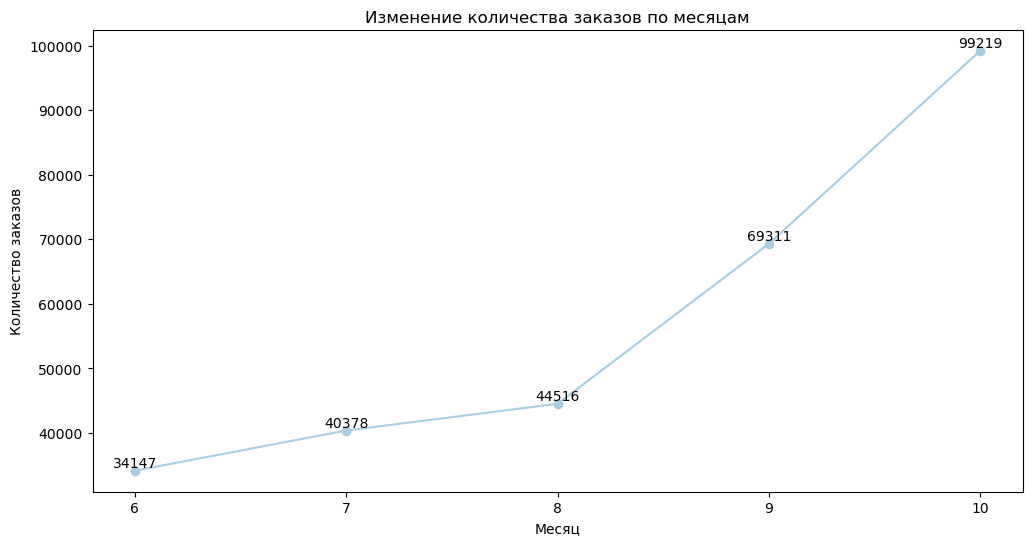

In [72]:
order = afisha.groupby('month')['order_id'].count().rename('count').reset_index()

# Создаем линейный график
plt.figure(figsize=(12, 6))
plt.plot(order['month'],order['count'],marker='o', linestyle='-', color=sns.color_palette("Paired")[0])

# Подписываем точки числами сверху
for idx, row in order.iterrows():
    plt.text(row['month'],row['count'], f"{row['count']}", ha='center', va='bottom', fontsize=10)
# Установка шага по оси X
ax = plt.gca()  # получаем текущие оси
ax.xaxis.set_major_locator(MultipleLocator(base=1))  # шаг равен 1 единицам

# Оформляем график
plt.title('Изменение количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')

plt.grid(False)
plt.show()

 В период `июнь-октябрь 2024 `наблюдается стабильный рост количества заказанных билетов через `Яндекс.Афиша`.  Осенью наблюдается выраженная положительная динамика роста, что может указывать на повышение активности пользователей. рост спроса на реализуемые билеты на мероприятия. Среди возможных причин роста метрики в осенний период можно выделить:
- начало учебного сезона: школьники, студенты возвращаются к культурной жизни;
- рост активности организационных мероприятий, то есть в осенний период возрастает количество интересных культурных мероприятий для более широкой публики. Осень богата фестивалями, театральными премьерами и музыкальными концертами, что привлекает дополнительное внимание пользователей;
-  благоприятные погодные условия;
- сезон отпусков подходит к концу, поэтому у вернувшихся растет интерес к мероприятиям внутри своего города и так далее.

Оценим есть ли зависимость между количеством купленных билетов в зависимости от сезона и типа устройства, с которого совершена покупка. 

In [73]:
### формируем датасет с данными по долям  в зависимости от типа устройства
device = (
    afisha
    .groupby(['season', 'device_type_canonical'])
    .size()                    
    .groupby(level=0)          
    .apply(lambda x: x/x.sum())  
    .rename('share')           
    .reset_index()             
)

In [74]:
device

,season,device_type_canonical,share
0,лето,desktop,0.193463
1,лето,mobile,0.806537
2,осень,desktop,0.203264
3,осень,mobile,0.796736


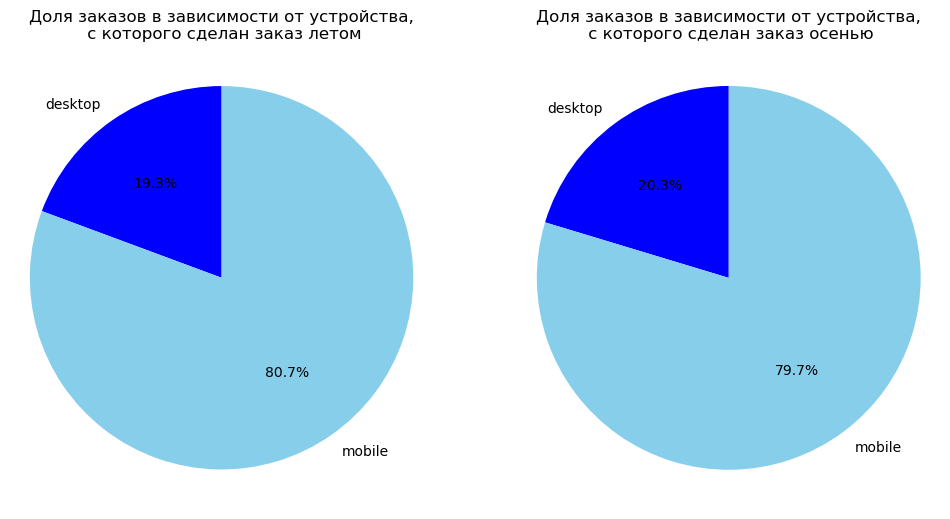

In [75]:
# Формируем данные для диаграммы для лета
summer = device[device['season']=='лето']
labels_summer = summer['device_type_canonical']
sizes_summer = summer['share']


# Формируем данные для диаграммы для лета
fall = device[device['season']=='осень']
labels_fall = fall['device_type_canonical']
sizes_fall = fall['share']

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  
# Круговая диаграмм для лета 
axes[0].pie(sizes_summer, labels=labels_summer, autopct='%1.1f%%', startangle=90,colors = ['blue','skyblue'])
axes[0].axis('equal')  # Равномерные оси делают круг идеальной окружностью
axes[0].set_title('Доля заказов в зависимости от устройства,\n с которого сделан заказ летом')

axes[1].pie(sizes_fall, labels=labels_fall, autopct='%1.1f%%', startangle=90,colors = ['blue','skyblue'])
axes[1].axis('equal')  # Равномерные оси делают круг идеальной окружностью
axes[1].set_title('Доля заказов в зависимости от устройства,\n с которого сделан заказ осенью')
plt.show()

Для анализируемых сезонов характерно чаще всего использовать для заказа мобильные устройства, так летом доля покупок, совершенных при помощи мобильного устройства составила 80,7%, а осенью доля покупок несколько снизилась до 79,7%. Среди возможных причин некоторого снижения доли заказов с мобильного телефона можно выделить:

- `погодные условия и мобильность`: летом пользователи более мобильны, предпочитают больше времени проводить вне дома, следовательно, чаще пользуются для совершения различных операций телефон. Осенью же погода становится прохладнее, люди больше времени проводят дома и соответственно пользуются чаще другими более удобными устройствами;
- `тип мероприятия`: летом распространены уличные мероприятия, на которые проще бронировать возможно билеты через мобильные устройства, осенью же ситуация противоположная;
- `технические ограничения`: осенью возможны обновления операционных систем смартфонов, которые могут приводить к временному снижению активности мобильного трафика.


In [76]:
## сформируем датасет для определения сезонности по age_limit

age = (afisha.groupby(['season','age_limit']).size().groupby(level = 0).apply(lambda x:x/x.sum()).rename('share_age')           
    .reset_index())
age

,season,age_limit,share_age
0,лето,0,0.179644
1,лето,6,0.182063
2,лето,12,0.205501
3,лето,16,0.283491
4,лето,18,0.149302
5,осень,0,0.236195
6,осень,6,0.176212
7,осень,12,0.221041
8,осень,16,0.262363
9,осень,18,0.104189


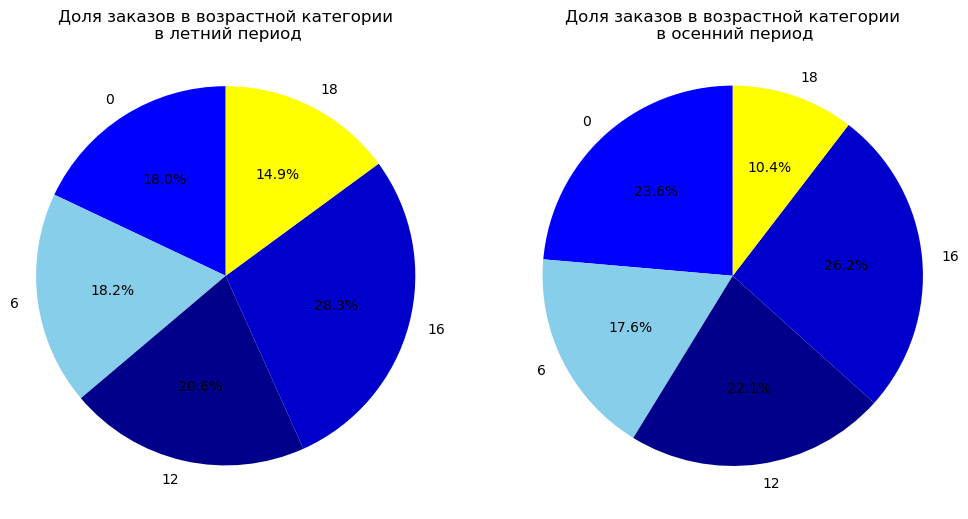

In [77]:
## формируем данные для диаграммы лета
summer_age = age[age['season']=='лето']
label_summer_age = summer_age['age_limit']
size_summer_age = summer_age['share_age']

## формируем данные для диаграммы осени
fall_age = age[age['season']=='осень']
label_fall_age = fall_age['age_limit']
size_fall_age = fall_age['share_age']

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 
color = ['blue','skyblue','darkblue','mediumblue','yellow']
# Круговая диаграмм для лета 
axes[0].pie(size_summer_age, labels=label_summer_age, autopct='%1.1f%%', startangle=90,colors = color)
axes[0].axis('equal')  # Равномерные оси делают круг идеальной окружностью
axes[0].set_title('Доля заказов в возрастной категории\n в летний период')

axes[1].pie(size_fall_age, labels=label_fall_age, autopct='%1.1f%%', startangle=90,colors = color)
axes[1].axis('equal')  # Равномерные оси делают круг идеальной окружностью
axes[1].set_title('Доля заказов в возрастной категории\n в осенний период')
plt.show()

Согласно имеющимся данным мы выделили `5 категорий` по возрастным ограничениям: `«0+»`, `«6+»`, `«12+»`, `«16+»`, `«18+»`.
Со сменой сезонов количество заказов в различных возрастных категориях также изменялось, а именно в летний период `14,8%` занимают заказы в категории `«16+»`, `«18+»`, при этом осенью возрастает интерес к мероприятиям без возрастных ограничений («0+») осенью `23,6%`, хотя летом достигала `18%` и событиям с низким порогом допуска («12+»). 

Таким образом, можно сказать что сезонность оказывает влияние на количество заказов в разрезе возрастных ограничений. Растет общая доля мероприятий, направленных на детскую и семейную публику.

In [78]:
### формируем датасет с данными по долям  в зависимости от типа мероприятия
event_type = (
    afisha
    .groupby(['season', 'event_type_main'])
    .size()                    
    .groupby(level=0)          
    .apply(lambda x: x/x.sum())  
    .rename('share_events')           
    .reset_index()             
)

In [79]:
event_type

,season,event_type_main,share_events
0,лето,выставки,0.020296
1,лето,другое,0.271352
2,лето,концерты,0.426441
3,лето,спорт,0.025235
4,лето,стендап,0.053309
5,лето,театр,0.201074
6,лето,ёлки,0.002293
7,осень,выставки,0.014454
8,осень,другое,0.196731
9,осень,концерты,0.372219


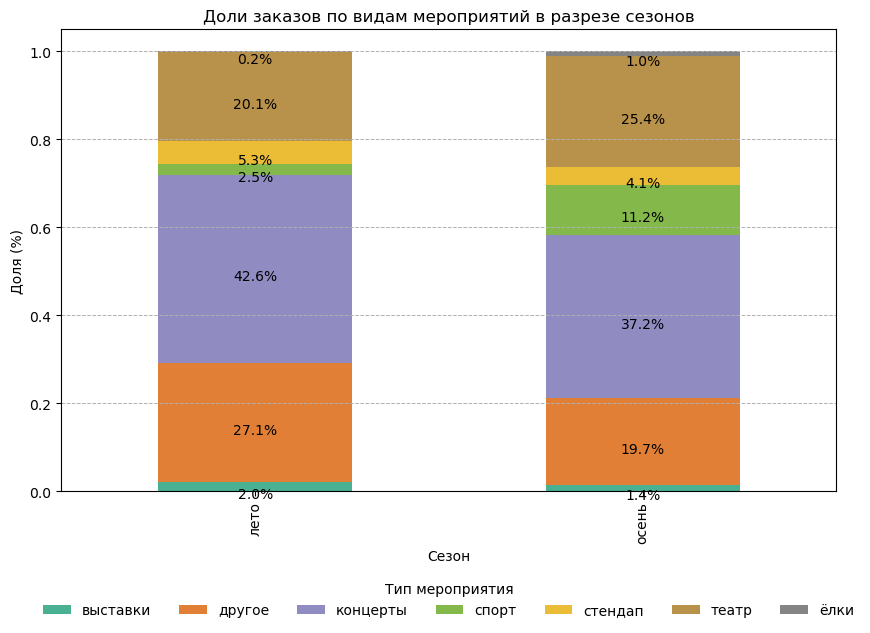

In [80]:
# Создание сводной таблицы для построения графика
pivot_table = event_type.pivot(index='season', columns='event_type_main', values='share_events')

# Настройка внешнего вида графика
fig, ax = plt.subplots(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, colormap='Dark2', figsize=(10, 6), alpha=0.8, ax=ax)

# Подписываем данные под столбцами
for i in range(len(pivot_table)):
    cum_height = 0  # Текущая высота для вычисления позиции
    for j in range(len(pivot_table.columns)):
        height = pivot_table.values[i][j]
        y_position = cum_height + height/2  # Ставим аннотацию посередине текущего сегмента
        label = f"{height*100:.1f}%"
        
        # Аннотируем позицию
        if height > 0:  
            ax.annotate(label, xy=(i, y_position),
                        ha='center', va='top',
                        fontsize=10, color='black')
        
        cum_height += height  # Обновляем высоту для следующего сегмента

# Оформление графика
plt.title("Доли заказов по видам мероприятий в разрезе сезонов")
plt.xlabel("Сезон")
plt.ylabel("Доля (%)")
plt.legend(
    title="Тип мероприятия",
    loc='lower center',                
    bbox_to_anchor=(0.5, -0.3),      
    ncol=len(pivot_table.columns),    
    frameon=False                     
)

plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

Основные наблюдения в рамках анализа влияния сезонности на структуру заказов по видам мероприятий:

- для лета характерна высокая доля `концертов` среди мероприятий `42,6%`, в осенний период доля концертов снизилась до `37,2%`;
- в осенний период вслед за снижением доли концертов выросла `доля театров` `с 20,1% до 25,4%`, что может быть результатом роста интереса пользователей к мероприятиям в закрытых помещениях;
- `спортивные мероприятия` также получают больший интерес осенью, увеличиваясь `с ~10% до 11,9%`, что может быть связано с началом спортивных чемпионатов и матчей.

Среди причин такого изменения в структуре предпочтений пользователей по типам мероприятий можно выделить:
- изменение климатических условий: летом благодаря теплой погоде люди скорее выберут мероприятия на открытом воздухе, а вот осенью из-за ухудшения погодных условий наоборот растет интерес к мероприятиям в помещениях;
- социальный фактор: осенью начинается учебный год, люди возвращаются из отпусков, что стимулирует интерес к музеям, театрам и так далее;
- работа организаторов мероприятий: организаторы адаптируют календарь мероприятий под сезонные потребности зрителей.


Таким образом, можно предварительно сказать, что такой показатель как объем заказов с значительной вероятностью подвержен сезонным изменениям, в том числе это подтвердил анализ показателя в разрезе типа устройства, типа мероприятия и категориям возрастного ограничения.


In [81]:
##выделяем данные по season
summer_season = afisha[afisha['season']=='лето'].copy()
fall_season = afisha[afisha['season']=='осень'].copy()

avg_summer_revenue = summer_season.groupby('event_type_main')['one_ticket_revenue_rub'].mean()
avg_fall_revenue = fall_season.groupby('event_type_main')['one_ticket_revenue_rub'].mean()

df_full = pd.concat([avg_summer_revenue,avg_fall_revenue], axis = 1, keys=['лето','осень']).reset_index()
df_full["persent_change"] = round((df_full['осень']-df_full['лето'])/df_full['лето']*100,2)

In [82]:
df_full

,event_type_main,лето,осень,persent_change
0,выставки,86.416198,90.603610,4.85
1,другое,77.391815,76.059694,-1.72
2,концерты,304.804906,268.381614,-11.95
3,спорт,50.744650,49.986591,-1.49
4,стендап,218.518107,231.124973,5.77
5,театр,214.179496,175.987956,-17.83
6,ёлки,271.436176,229.564210,-15.43


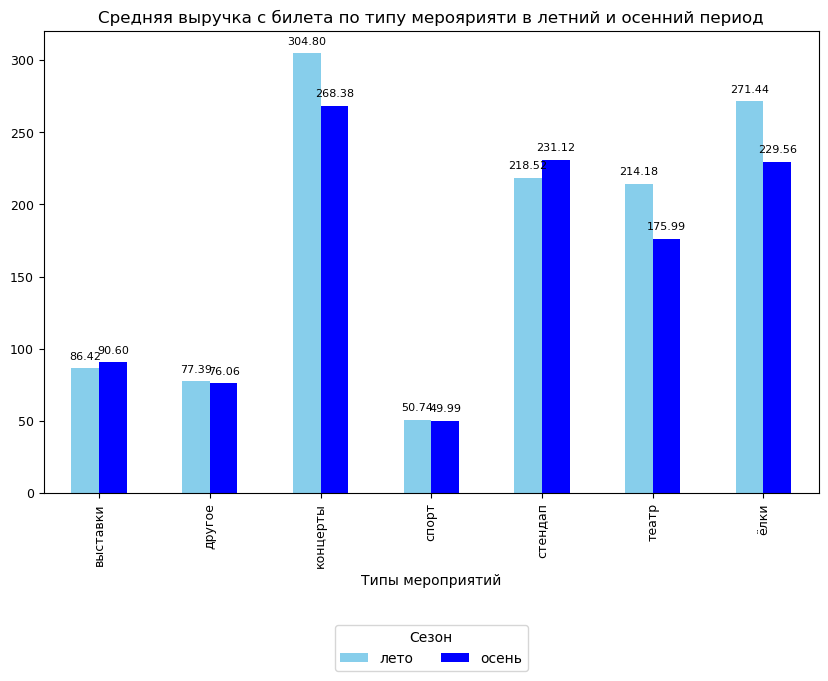

In [83]:
ax = df_full.plot(x  = 'event_type_main', y = ['лето', 'осень'], color = ['skyblue','blue'],kind = 'bar',figsize=(10, 6))
# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.title('Средняя выручка с билета по типу мероярияти в летний и осенний период')
plt.xlabel('Типы мероприятий', fontsize = 10)
plt.tick_params(labelsize = 9)
plt.grid(False)
plt.legend(ncol=len(ax.patches), loc='lower center', bbox_to_anchor=(0.5, -0.4), title='Сезон')
plt.show()

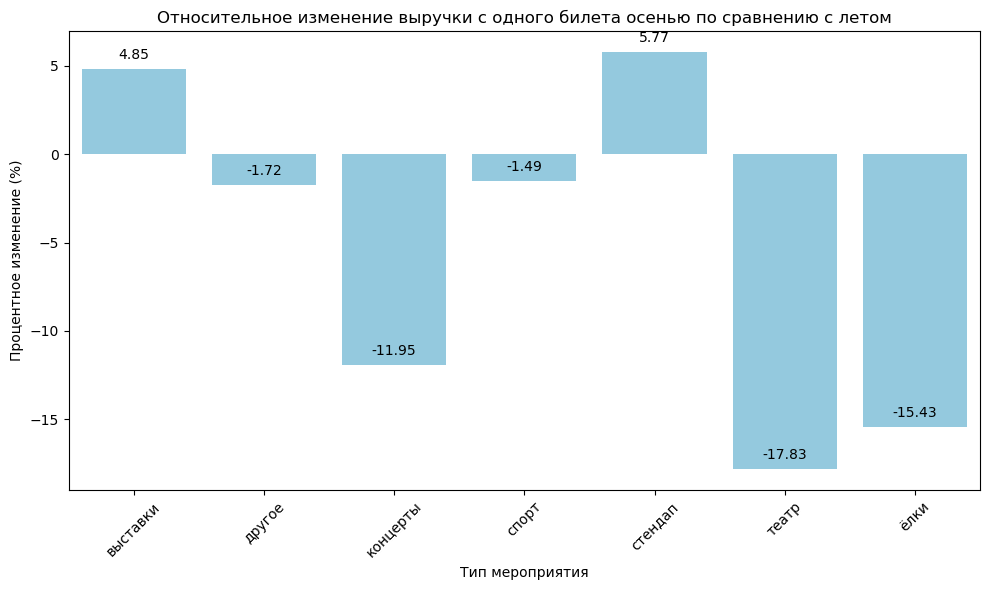

In [84]:
# Строим график
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='event_type_main', y='persent_change', data=df_full,color = 'skyblue')
# Аннотирование высоты каждого бара
for p in ax.patches:
    height = p.get_height()
    text = f"{height:.2f}"  # Форматируем число с двумя знаками после запятой
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)
plt.title('Относительное изменение выручки с одного билета осенью по сравнению с летом')
plt.xlabel('Тип мероприятия')
plt.ylabel('Процентное изменение (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

По результатам проведенных расчетов мы можем   отметить:
- осенью наблюдается значительное снижение средней выручки с одного билета по следующим типам мероприятий:
    - Концерты: сокращение на 11,95%;
    - Театры: снижение на 17,83%;
    - Ёлки: уменьшение на 15,43%.
- единственным направлением, где отмечен рост выручки, стал стендап (+5,77%)
Среди причин такого изменения в цене можно выделить:
- цена на билет могла быть снижена специально в осенний период для стимулирования спроса пользователей на определенные мероприятий;
- реализация промо-акций;
- изменение качества мероприятий, то есть снижение средней выручки может быть результатом ухудшения качества организуемых мероприятий;
- экономическая нестабильность в стране, снижение покупательной способности пользователей. 

Несмотря на значительное снижение средней выручки с одного билета в ряде направлений, объем заказов в осенний период заметно превысил летний. Этот феномен может быть следствием повышенного спроса на культурно-развлекательные мероприятия осенью, когда горожане возвращаются к активной социальной жизни после летнего отдыха.

Таким образом, снижение средней выручки компенсируется ростом общего объема заказов, что поддерживает положительные финансовые показатели компании.

## Предварительные выводы по результатам исследования: 

- исследование объема заказов показало, что показатель вырос с `34147` до `99219` заказов, причем пиковый рост данных приходиться на осенний период. Такое существенное увеличение данных   является результатом совокупности факторов, в том числе осень - это начало театрального сезона, также в этот период растет число семенных мероприятий и так далее;
- анализ распределения заказов в зависимости от сезона и типа устройства показало, что в летний период пользователи чаще всего делают заказы с мобильных устройств (`80,7%`), а вот осенью доля заказов снизилась до `79,7%`, что что может объясняться тем, что осенью пользователи больше времени проводят дома и выбирают настольные устройства для покупки билетов;
- анализ распределения количества заказов по возрастным категориям показал, что осенью растет доля заказов без возрастных ограничений, а вот летом больше заказов на мероприятия категории «18+» (`14,5%`), что связано с активным туристическим сезоном и молодежными развлечениями;
- оценка заказа по типу мероприятий показала, что осенью наблюдается рост доли заказов на театральные и спортивные мероприятия, а лето - это период с высокой долей концернов, что связано с возможностью проведения массовых музыкальных событий на открытой площадке;
-  исследование так же показало, что осенью стоимость билетов на театр, ёлки и концерты снизилась в среднем более чем `+ 10%`, что может объяснить уменьшение средней выручки с одного билета, а стоимость билетов на стендапы и выставки напротив увеличилась, что указывает на их растущую популярность осенью.

Сезонность играет важную роль в объеме заказов и выручке. Для повышения точности и детализации будущих прогнозов необходимо провести более глубокое исследование по отдельным категориям мероприятий и возрастным сегментам.


 ### Осенняя активность пользователей

Важным моментом является проведение исследования того как пользователи вели себя в ближайший сезон, так как мы определили, что осенью происходят значительные изменения в показателях. Поэтому проведем исследование активности пользователей в зависимости от даты, в частности нам необходимо посчитать следующие метрики:
- `общего числа заказов`;
- `количества активных пользователей DAU`;
- `среднего числа заказов на одного пользователя`;
- `средней стоимости одного билета`.

В дополнение следует посмотреть на цикличность активности пользователей в зависимости от дня недели.


In [85]:
##выделяем данные осени

fall = (afisha[afisha['season']>='осень']).reset_index(drop = True).copy()

##формируем сводную таблицы для расчета показателей
fall_afisha = pd.pivot_table(fall, index = 'created_dt_msk',
                                      values = ['order_id',"user_id",'one_ticket_revenue_rub'], 
                              aggfunc = {'order_id': 'count', 'user_id' : 'nunique', 'one_ticket_revenue_rub': 'mean'}).reset_index()

In [86]:
fall_afisha.columns = ['date','mean_price','amount_order','dau']

In [87]:
## добавили расчет среднего количества заказов на 1 пользователя.
fall_afisha['orders_per_user'] = round(fall_afisha['amount_order'] / fall_afisha['dau'],2)

In [88]:
fall_afisha.head()

,date,mean_price,amount_order,dau,orders_per_user
0,2024-09-01,200.168708,1327,564,2.35
1,2024-09-02,189.464639,1380,574,2.40
2,2024-09-03,80.350151,5113,778,6.57
3,2024-09-04,178.077235,1772,685,2.59
4,2024-09-05,189.763046,1940,739,2.63


Сформируем функцию, которая позволит нам  построить графики и упростит процесс исследования.

In [89]:
def plot_line(df, categorical_column, quantitative_column, marker=None, linestyle=None, title=None, xlabel=None, ylabel=None, color=None, rot=None, legend=None):
    fig, ax = plt.subplots(figsize=(12, 6))
    df.plot(kind="line", x=categorical_column, y=quantitative_column, ax=ax, marker=marker, linestyle=linestyle, color=color, legend=legend)
    
    # Создаем аннотации
    texts = [
        ax.annotate(f"{val:.0f}",
                   xy=(idx, val),
                   ha='center',
                   va='bottom',
                   rotation=10,
                   fontsize=7.5,
                   color = 'black')
        for idx, val in zip(df[categorical_column], df[quantitative_column])
    ]
    
    # Подгоняем положение аннотаций
    adjust_text(texts, arrowprops={'arrowstyle': '->'})
    
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    if rot: plt.xticks(rotation=rot)
    
    plt.show()

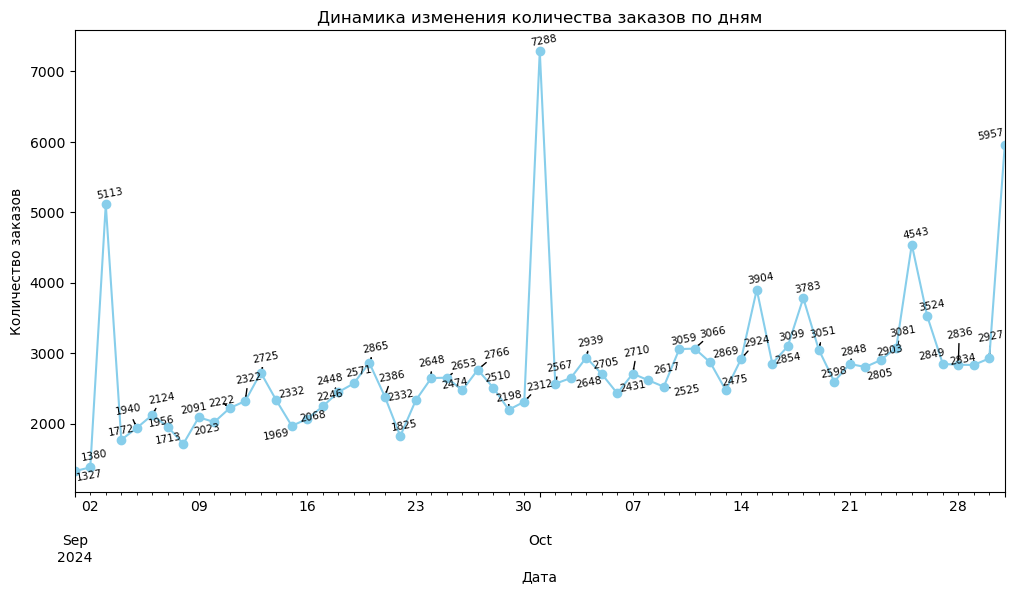

In [90]:
plot_line(df=fall_afisha, 
          categorical_column='date',
          quantitative_column='amount_order',
          marker='o', 
          linestyle='-', 
          title='Динамика изменения количества заказов по дням',
          xlabel='Дата',
          ylabel='Количество заказов',
          color='skyblue')

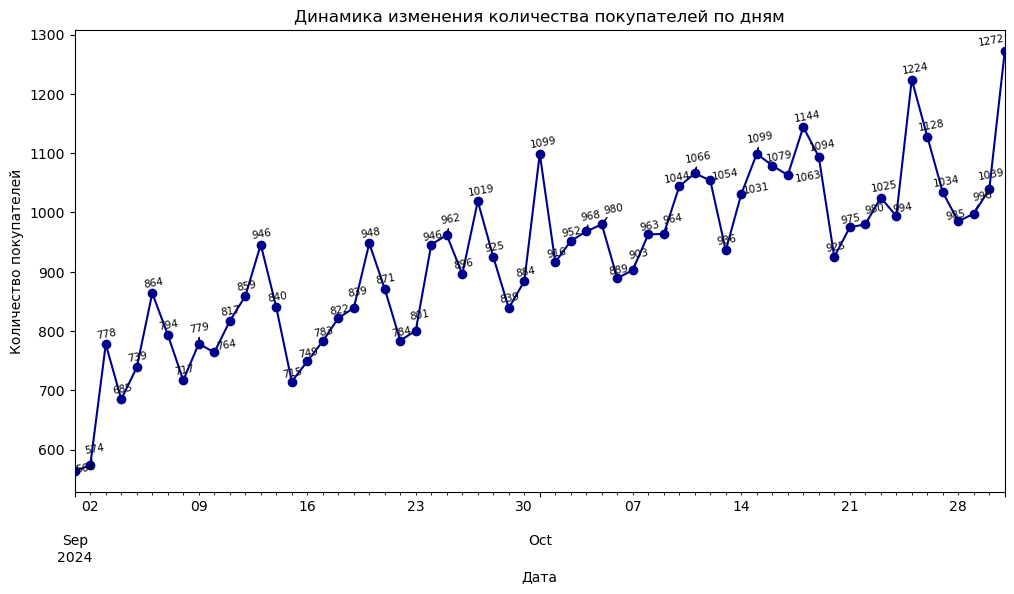

In [91]:
plot_line(df=fall_afisha, 
          categorical_column='date',
          quantitative_column='dau',
          marker='o', 
          linestyle='-', 
          title='Динамика изменения количества покупателей по дням',
          xlabel='Дата',
          ylabel='Количество покупателей',
          color='darkblue')

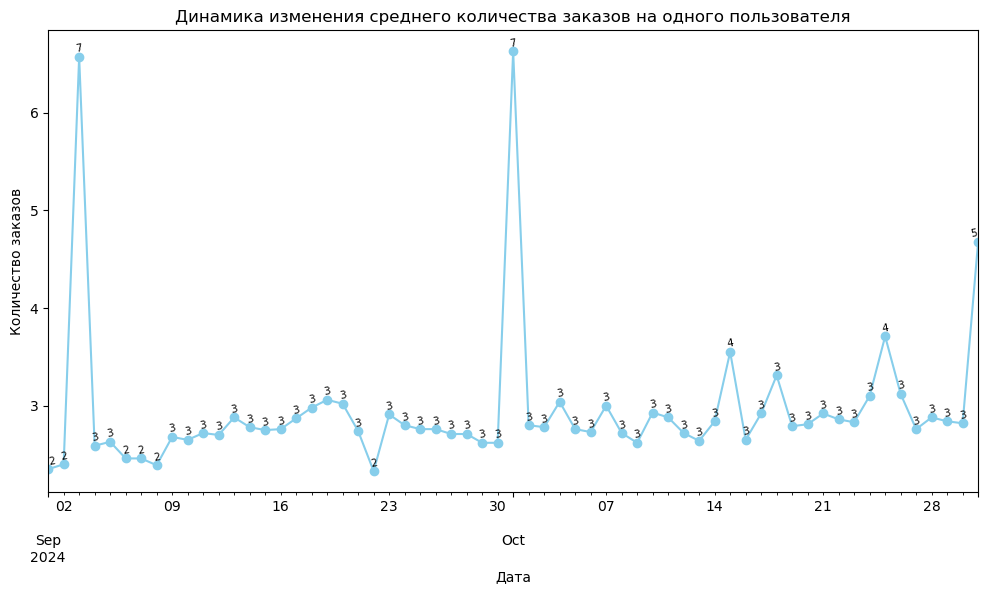

In [92]:
plot_line(df=fall_afisha, 
          categorical_column='date',
          quantitative_column='orders_per_user',
          marker='o', 
          linestyle='-', 
          title='Динамика изменения среднего количества заказов на одного пользователя',
          xlabel='Дата',
          ylabel='Количество заказов',
          color='skyblue')

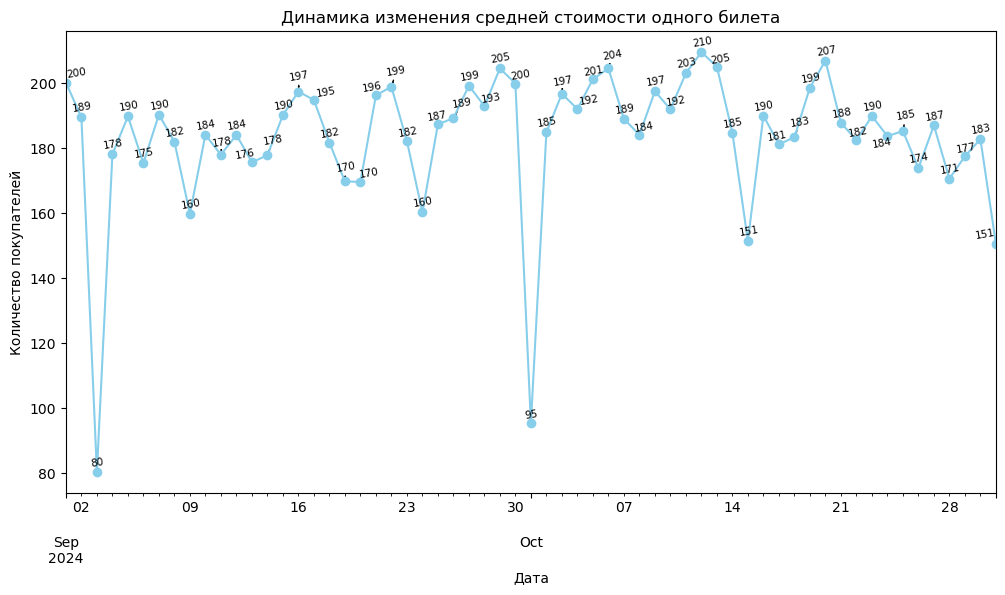

In [93]:
plot_line(df=fall_afisha, 
          categorical_column='date',
          quantitative_column='mean_price',
          marker='o', 
          linestyle='-', 
          title='Динамика изменения средней стоимости одного билета',
          xlabel='Дата',
          ylabel='Количество покупателей',
          color='skyblue')

Исследование графика отражающий динамку изменения количества заказов показывает ряд резких всплесков в данных, которые в основном видны на начало месяца `( 3 сентября,1 октября) `и на конец месяца`(25 и 31 октября)`. В остальные же дни количество заказов изменяется плавно без резких и значительных аномальных всплесков.

Если мы посмотрим на график распределения количества уникальных пользователей, то  наблюдается волнообразный рост показателя, так если на начало рассматриваемого периода уникальное количество пользователи составляло `564 человека`, то на 31.10.2024 уже `1272 человека`.  При этом если обратить внимание на даты графика с количеством заказов и количеством пользователей, то мы можем увидеть, что пиковые значения по втором графике совпадают со значениями на первом, то есть рост количества заказов происходит в том числе за счет прироста покупателей.

Анализ дневной динамики изменения средней стоимости одного билета происходило волнообразно, при этом наблюдаются значительные пиковые спады в цене билета. Так если посмотреть, то пиковое снижение цены приходилось на `3 сентября `- средняя цена составил `80 рублей`, `1 октября` - `ср.стоимость составила 95 рублей` и `15 октября и 31 октября  2024 года` составила `151 рублей `, когда при этом мы видим увеличение числа уникальных пользователей.  Можно предполагать, что увеличение пользователей произошло за счет того, что возможно цена на билеты снижалась или, были специальные промо-акции и так далее.  Также отметим, что ключевой рост средне стоимости приходится на дни, когда объем продаж несколько проседал.

График изменения среднего количества заказов на одного пользователя показывает прямую взаимосвязь с динамикой средней стоимости билетов.Так даты пикового роста наблюдаются в начале месяца  `3 сентября,1 октября`и и `15 октября и 31 октября  2024 года октября`, что подтверждает общую тенденцию увеличения активности пользователей в указанные периоды.




Далее исследуем недельную цикличность, то есть необходимо узнать в какие дни  покупатели более активны.


In [94]:
# Добавляем день недели
fall['weekday_name'] = fall['created_dt_msk'].dt.strftime('%A')
# группируем данные по неделе и рассчитываем число  пользователей в разрезе дня недели
weekly_activity = fall.groupby('weekday_name')['user_id'].count()

# Нормализуем дни недели для сортировки
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_activity = weekly_activity.reindex(weekday_order)

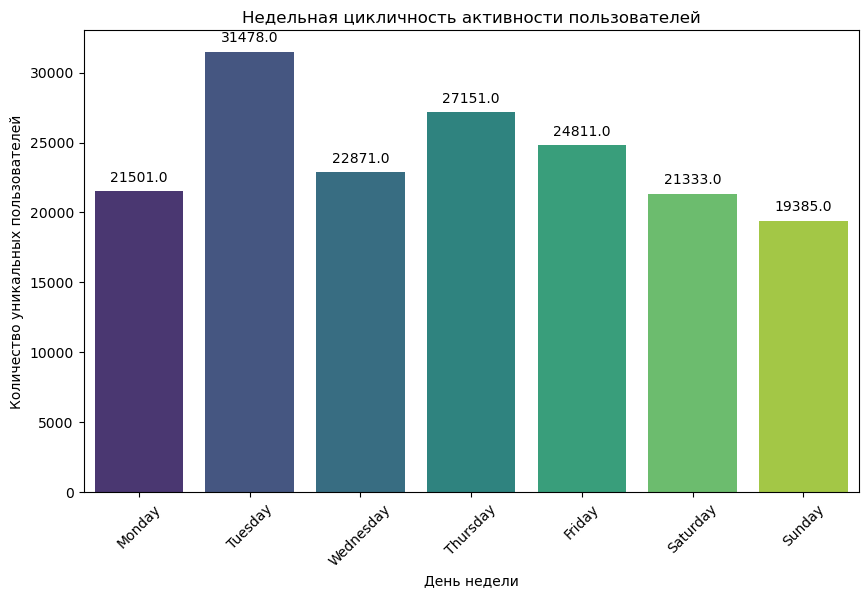

In [95]:
# Создаем фигуру с указанным размером
plt.figure(figsize=(10, 6))

# Визуализация с помощью Seaborn
ax = sns.barplot(x=weekly_activity.index, y=weekly_activity.values, palette="viridis")

# Добавляем аннотации на графике
for p in ax.patches:
    height = p.get_height()
    text = f"{height}"
    ax.annotate(text, xy=(p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=10)

plt.title('Недельная цикличность активности пользователей')
plt.xlabel('День недели')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=45)
plt.show()

Исследование цикличности активности пользователей в разрезе дня недели показывает, что пользователи чаще всего совершают покупку именно во вторник и четверг на сервисе по бронированию билетов в Яндекс.Афиша. В качестве причин такой динамики можно  определить следующие:
1.	психологический фактор начала недели, так как во вторник пользователи начинают активно планировать свою неделю, в том числе и досуг;
2.	возможное наличие определенных акций или скидок в начале недели, что позволяет пользователям активнее заходить на сайт;
3.	оптимизация рабочего графика, так как основная часть населения городов все-таки работает по пятидневному графику, и четверг воспринимается как последний удобный рабочий день для покупки билетов на события следующего уик-энда.

Представленные выше причины цикличности не все, но основные и на них может базироваться  формирование маркетинговой политики по развитию сервиса и так далее.


 ### Предварительные выводы по оценке осенней активности пользователей


- исследование показало, что резкие скатки в динамике показателей приходятся в основном на начало и на конец месяца (например, 3 сентября, 1 октября, 25 и 31 октября);
- волнообразный рост числа уникальных пользователей: от 564 человек на старте до 1272 человек на 31 октября.Пики на графиках совпадают, что свидетельствует о прямой корреляции между увеличением количества пользователей и ростом заказов. Если на начало исследуемого периода было зафиксировано `564` уникального пользователя, то на конец периода показатель вырос до `1274 `человека. Такой рост свидетельствует о положительной динамике развития сервиса, хотя необходимо более подробно изучить причины роста;
- показатель средней стоимости одного билета в анализируемый период также изменялась волнообразно, при этом также наблюдалось ярко выраженное снижение цены  и рост среднего количества заказов на одного пользователя в некоторые ключевые даты `(3 сентября, 1 октября, 15 и 31 октября)`. Снижение цены, как и изменение других показателей может быть результатом реализации различных аукционных предложений, в том числе включая уменьшение цены ближе к началу мероприятия, специальное предложение на конкретные даты и использование скидочных механизмов;
- максимальная активность пользователей в разрезе дня недели наблюдается во вторник и четверг. Такая активность может быть результатом совокупности факторов, в том числе поведением пользователей которые во вторник и четверг планируют свою неделею и досуг, наличие определенных скидок в данные дни и так далее;
- рекомендации:
    - Укрепить маркетинговую политику, синхронизировав её с сезонными изменениями;
    - Использовать ценовые акции для стимулирования спроса в периоды низкого уровня активности;
    - Совершенствовать предложение билетов, фокусируясь на привлечении новых пользователей в спокойные периоды.


 ###  Популярные события и партнёры

Проведем далее исследование регионов и наиболее топовых партнеров для того чтобы проанализировать дальнейшие возможности для развития сервиса Яндекс.Афиша.

In [96]:
region_afisha = pd.pivot_table(afisha,index = 'region_name', values = ['order_id','event_name','revenue_rub'], aggfunc = {'order_id':'count',
                                                                                                      'event_name': 'nunique',
                                                                                                       'revenue_rub': 'sum'}).reset_index()
# Преобразование суммы выручки в обычный формат и округление до 2-х знаков после запятой
region_afisha['revenue_rub'] = round(region_afisha['revenue_rub'], 2)

region_afisha.columns = ['region_name','amount_events','amount_orders','revenue_rub'] 
region_afisha['events_share'] = round(100*region_afisha['amount_events']/region_afisha['amount_events'].sum(),3)
region_afisha['order_share'] = round(100*region_afisha['amount_orders']/region_afisha['amount_orders'].sum(),3)
region_afisha['revenue_share'] = round(100*region_afisha['revenue_rub']/region_afisha['revenue_rub'].sum(),3)

In [97]:
sort_region_afisha=region_afisha.sort_values(by='amount_orders',ascending=False )

In [98]:
sort_region_afisha

,region_name,amount_events,amount_orders,revenue_rub,events_share,order_share,revenue_share
23,Каменевский регион,4748,89640,55889161.35,24.781,31.171,37.484
60,Североярская область,3196,43622,21978973.26,16.681,15.169,14.741
77,Широковская область,992,16164,8627050.68,5.177,5.621,5.786
42,Медовская область,485,13890,2925735.65,2.531,4.830,1.962
45,Озернинский край,307,10403,9553400.74,1.602,3.618,6.407
...,...,...,...,...,...,...,...
33,Лесноярский край,2,19,3779.16,0.010,0.007,0.003
32,Крутоводский регион,7,18,4870.98,0.037,0.006,0.003
5,Верхозёрский край,2,11,2180.02,0.010,0.004,0.001
66,Сосноводолинская область,2,10,1746.95,0.010,0.003,0.001


В выборке представлены данные о `81 регионе`, среди которых в качестве лидеров по количеству мероприятий и  заказов можно выделить `Каменевский регион`,`Североярская область`, в  которых проводится более `40%` всех мероприятий и  сделано более `46%` заказов. Такая высокая концентрация показателей в данных районах  можно рассматривать как положительный фактор, так как мы видим высокую популярность проводимых мероприятий у населения.  При этом малая доля присутствия в других района может сказаться негативно на результатах работы сервиса. Поэтому, стоит подробно рассмотреть причины того, что только в 2х районах сформирована львиная доля показателей. 

Также стоит отметить, что `Каменевский регион и Североярская область` приносят сервису `52,25%` всей выручки. Если посмотреть у сервиса есть также большая доля аутсайдеров - регионов, таких как `Лесноярский край`,`Крутоводский регион`,`Верхозёрский край`,`Теплоозёрский округ` и `Сосноводолинская область`, на данные регионы приходится `менее 0,1%` выручки и заказов  от общего объема.



In [99]:
organizer_afisha = pd.pivot_table(afisha,index = 'organizers', values = ['order_id','event_name','revenue_rub'], aggfunc = {'order_id':'count',
                                                                                                      'event_name': 'nunique',
                                                                                                     'revenue_rub':'sum' }).reset_index()

organizer_afisha.columns = ['organizers','amount_events','amount_orders','revenue_rub']
organizer_afisha['events_share'] = 100*organizer_afisha['amount_events']/organizer_afisha['amount_events'].sum()
organizer_afisha['order_share'] = 100*organizer_afisha['amount_orders']/organizer_afisha['amount_orders'].sum()
organizer_afisha['revenue_share'] = 100*organizer_afisha['revenue_rub']/organizer_afisha['revenue_rub'].sum()


In [100]:
sort_organizer_afisha=organizer_afisha.sort_values(by='amount_events',ascending=False )
sort_organizer_afisha

,organizers,amount_events,amount_orders,revenue_rub,events_share,order_share,revenue_share
870,№1874,119,679,344414.16,0.599829,0.236116,0.230996
4012,№5024,110,878,447568.76,0.554463,0.305316,0.300181
3537,№4549,106,3971,0.00,0.534301,1.380876,0.000000
2430,№3436,104,1780,595601.91,0.524220,0.618978,0.399466
741,№1745,102,1341,988760.23,0.514139,0.466320,0.663155
...,...,...,...,...,...,...,...
2735,№3741,1,2,1052.98,0.005041,0.000695,0.000706
2734,№3740,1,1,55.72,0.005041,0.000348,0.000037
2733,№3739,1,5,1193.19,0.005041,0.001739,0.000800
2732,№3738,1,1,138.38,0.005041,0.000348,0.000093


Всего на сервисе зарегистрировано `4281 организатор`, и среди них сложно выделить единого безусловного лидера, так как показатели отличаются большим разбросом.

Лидеры среди организаторов по выручке:
- организатор `№4054`:Максимальный показатель выручки — `3,02%` от общей выручки сервиса. Организовал всего 9 мероприятий, получив `4326` заказов. Его мероприятия пользовались особой популярностью у пользователей;
- среди других лидеров по выручке можем выделить: 
    - организатор №4950;  
    - организатор №4086;  
    - организатор №4403;  
    - организатор №2121.

Лидеры среди организаторов по количеству заказов:
- организатор  `№1531` получил самое большое число заказов в размере `9743`, при этом выручка данного организатора составила `1 048 288,14 рублей`, что указывает на невысокую цену билетов;
- организатор `№2121` занял второе место по числу заказов в размере 4722, при этом выручка значительно выше чем у организатора `№1531` и составила `2 195 464,34 рублей`, что говорит о хорошей рентабельности мероприятий;
-  организатор `№4054` занял третье место по количеству заказов с `4326`.

Лидеры по количеству мероприятий:
- организатор `№1874`:Всего организовал `119` мероприятий, но показатели заказов и выручки низкие;
- организатор `№5024`:`110` мероприятий, но опять же слабые показатели по остальным параметрам.

Эти результаты подчеркивают важность комплексного подхода к оценке эффективности деятельности организаторов. Показатели выручки, количества заказов и мероприятий зависят друг от друга и влияют на общие итоги работы платформы.


### Предварительные выводы в результате исследования популярных событий и партнёров

- доминирующие регионы по количеству мероприятий: Каменевский регион и Североярская область, они занимают более `40%` всех мероприятий, `46%` заказов и `2,25%` выручки. Это свидетельствует о востребованности сервиса в указанных регионах, но при этом растет риск сильной зависимости от конкретных пользователей;
- в остальных регионах данные распределены относительно равномерно, однако есть несколько ярких аутсайдеров, где показатель выручки и доли заказов не превышает   `0,1% `, среди таких регионов можно выделить `Лесноярский край ` , `Крутоводский регион `, `Верхозёрский край `, `Теплоозёрский округ ` и `Сосноводолинская область `;
- исследование организаторов мероприятий показало, что было зарегистрировано `4281` организатор, однако среди них сложно выделить абсолютного лидера, так как показатели сильно варьируются. Некоторые организаторы выделяют за счет небольших объемов мероприятий, но максимальной выручки (например, `№4054`, который провёл всего `9` мероприятий, но обеспечил максимальную долю выручки — `3,02%`);
- топ организаций по количеству заказов можно выделить организаторов `№1531 `и `№2121 `, так они принести `9743 ` и `4722 ` заказа соответственно, при этом   реализуя соответственно `65 ` и `35 ` видов мероприятий. Однако различия в общей выручке свидетельствуют о различиях в средних чеках и возможной роли цены в привлечении аудитории.;
- ведущие по количеству мероприятий (`№1874` и `№5024`) предлагают широкий ассортимент (`119` и `110` мероприятий соответственно), но это не всегда приводит к высокому объёму заказов и доходов.

## Промежуточные выводы по исследовательскому анализу данных активности пользователей


По итогам проведенного анализа выявлены следующие закономерности и особенности:

- исследование сезонности и объемов заказов:
    - в осенний сезон прослеживается значительное увеличение объемов заказов и выручки по сравнению с летом, при этом показатель увеличился с `34147` заказов до  `99219` заказов в октябре;
    - данная динамика подтверждает наличие сезонных колебаний в активности пользователей.
- исследование активности пользователей в зависимости от типа устройства показало, что пользователи предпочитают использовать мобильне устройства `(около 80%)`, причем тенденция сохраняеться и в осенний период;
- анализ возрастных ограничений позволил выявить, что осенью повышается интерес к семейным мероприятиям и снижается интерес к контенту категории «18+», что отражает переход к семейному досугу;
- состав и структура наиболее популярных типов мероприятий также меняется в зависимости от сезона, так летом более популярны различные концерты, то уже в осенний период растет доля театральных и спортивных мероприятий;
- оценка средней выручки с билета в разрезе типа мероприятия показало, что летом цены на часть мероприятий выше чем осенью. Больше всего разрыв виден по `театральным мероприятиям`, `елкам и концертам`, так как цена снизилась в среднем более чем на `10%`, а вот на стендап и выставки наоборот выросла;
- наблюдается рост количества уникальных пользователей увеличилось, что свидетельствует о положительном развитии сервиса;
- среди регионов лидирующие позиции среди регионов по количеству заказов и выручки занимают `Каменевский регион ` и `Североярская область, ` на которые приходится `свыше 40% ` всех проводимых мероприятий и `более 46% ` общего объема заказов, а также `52,25% ` всей выручки сервиса. Существует серьезный дисбаланс в региональном покрытии, что требует стратегии выхода на новые рынки;
- многие организаторы обеспечивают небольшой процент выручки, среди лидеров выделяются №4054 и №1531, что подчёркивает необходимость индивидуальных подходов к крупнейшим игрокам.


Таким образом, мы выявили наличие сезонности в данных, а также ряд специфических тонких мест работы сервиса, которые необходимо исследовать тщательнее.


 ## Статистический анализ данных и проверка гипотез активности пользователей мобильных и стационарных устройств

В рамках нашего проекта необходимо провести оценку двух важных гипотез об активности пользователей в зависимости от типа устройства с которого делается покупка. 
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

Исследование будет проводиться только на основании данных за **осенний период**.



 ###  Проверка гипотезы о среднем количество заказов на одного пользователя

Перед тем как приступать к статистической оценке гипотез, очень важно для начала проведём оценку качества выборок, определим наличие независимости выборок и наличие или отсутствие нормального распределения данных, так как это важно для выбора и проведения теста.

In [101]:
## формируем выборки по мобильным и стационарным устройствам по осеннему сезону
mobile = afisha[(afisha["device_type_canonical"] == "mobile") & (afisha["season"] == "осень")].reset_index(drop=True).copy()

desktop = afisha[(afisha["device_type_canonical"] == "desktop") & (afisha["season"] == "осень")].reset_index(drop=True).copy()


In [102]:
print(f'Размер выборки данных по  mobile:{len(mobile)}')
print(f'Размер выборки данных по desktop: {len(desktop)}')

Размер выборки данных по  mobile:134274
Размер выборки данных по desktop: 34256


Для качественной проверки гипотезы очень важно, чтобы выборки были репрезентативны и независимы, поэтому нам необходимо провести исследование наличия или отсутствия пересечений между пользователями.

In [103]:
# Находим пересечение множеств пользователей
device = set(mobile['user_id'].unique()) & set(desktop['user_id'].unique())

# Подсчитываем количество пересечений
number_of_intersections = len(device)

# Выводим результат
if number_of_intersections > 0:
    print(f"Количество пользователей, сделаших покупки с обоих устройств: {number_of_intersections}")
else:
    print("Пересечений среди пользователей нет")

Количество пользователей, сделаших покупки с обоих устройств: 3248


Было обнаружено `3248` пользователей, которые пользовались одновременно обоими устройствами. Поэтому для чистоты эксперимента необходимо данных пользователей удалить для устранения  пересечения выбоок

In [104]:
# Удаляем пересекающихся пользователей
device_mobile = mobile[~mobile['user_id'].isin(device)].reset_index(drop=True)
device_desktop= desktop[~desktop['user_id'].isin(device)].reset_index(drop=True)

In [105]:
# Находим пересечение множеств пользователей
new_device = set(device_mobile['user_id'].unique()) & set(device_desktop['user_id'].unique())

# Подсчитываем количество пересечений
num_of_intersections = len(new_device)

# Выводим результат
if number_of_intersections > 0:
    print(f"Количество пользователей, сделаших покупки с обоих устройств: {num_of_intersections}")
else:
    print("Пересечений среди пользователей нет")

Количество пользователей, сделаших покупки с обоих устройств: 0


In [106]:
print(f'Размер выборки данных по  mobile:{len(device_mobile)}')
print(f'Размер выборки данных по desktop: {len(device_desktop)}')

Размер выборки данных по  mobile:31273
Размер выборки данных по desktop: 3189


После очистки данных мы видим, что размер выборки не сопоставим, так как пользователей мобильных устройств почти в 10 раз больше. При этом для проведения статистических тестов нам важен не столько размер выборки, сколько наличие или отсутствие нормального распределения данных.
Поэтому, для начала построим графики, которые позволят увидеть, как распределены данные в выборках и также мы можем провести `тест Колмогорова – Смирнов`а для подтверждения результатов.


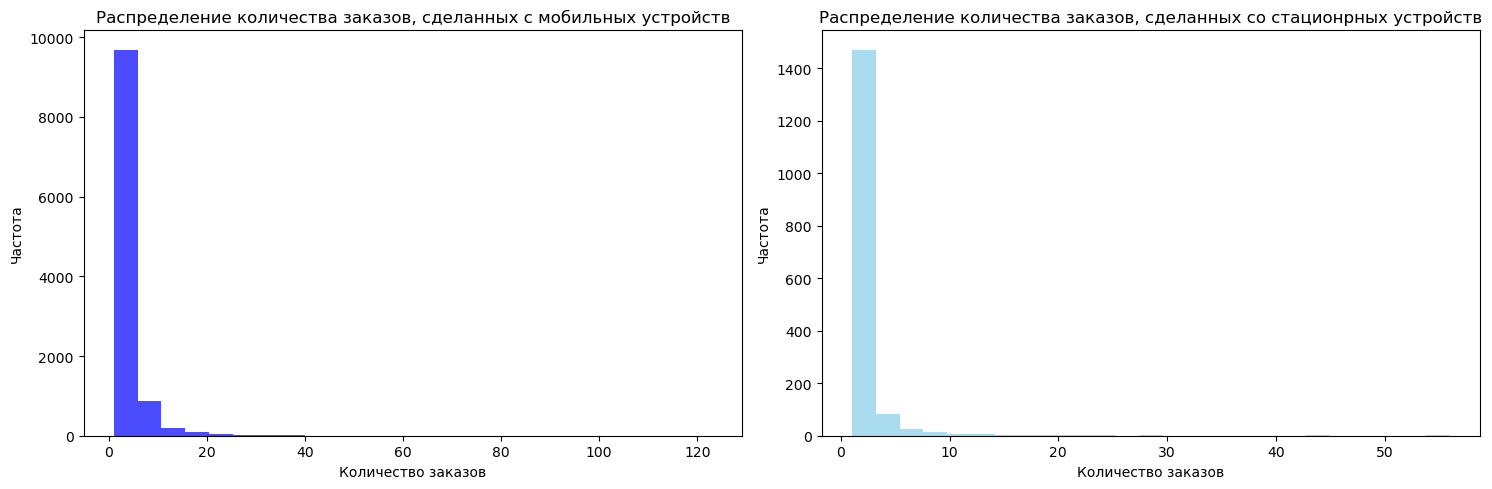

In [107]:
## формируем данные с количеством заказов каждого пользователя
order_mobile = device_mobile.groupby('user_id')['order_id'].count().reset_index(name='count_orders')
order_desktop = device_desktop.groupby('user_id')['order_id'].count().reset_index(name='count_orders')

# Создаем фигуру и оси для двух подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Подграфик для мобильных устройств
ax1.hist(order_mobile['count_orders'], bins=25, color='blue', alpha=0.7)
ax1.set_xlabel('Количество заказов')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение количества заказов, сделанных с мобильных устройств')


# Подграфик для стационарных устройств
ax2.hist(order_desktop['count_orders'], bins=25, color='skyblue', alpha=0.7)
ax2.set_xlabel('Количество заказов')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение количества заказов, сделанных со стационрных устройств')


# Отображаем графику
plt.tight_layout()  # Уменьшаем пустое пространство между подграфиками
plt.show()

Как видно из графиков, то данные не имеют нормального распределения, так как основныя часть сосредоточена между 0 и 10, а тажке есть "хвост" в данных. 

Дополнительно для определения статестического теста с помощью которого будем проводить исследование гипотезы определим равны ли дисперсии, так как для ряда тесто это необходимое условие также.

In [108]:
dis_mob = order_mobile['count_orders'].var()
dis_des = order_desktop['count_orders'].var()
print (f'Дисперсия количества заказов  с помощью мобильных устройств: {dis_mob:.2f}')
print (f'Дисперсия количества заказов  с помощью стационарных устройств: {dis_des:.2f}')

Дисперсия количества заказов  с помощью мобильных устройств: 16.79
Дисперсия количества заказов  с помощью стационарных устройств: 9.35


Однако, для получения еще более точного подтверждения о качестве распределения данных проведем `тест Шапиро`, но при условии, что выборка не превышает 5 000 наблюдений. Однако, так как в разрезе мобильных устройств выборка у нас достаточно большая, то можно использовать альтернативу `тест Anderson-Darling`. 

Соответственно, наша гипотеза звучит так: Данные в выборке о количестве заказов, сделанных с устройства, не имеют нормального распределения. Исходя из этого:

- `Нулевая гипотеза`: Данные в выборке о количестве заказов, сделанных с устройства, имеют нормального распределения;
- `Альтернативная гипотеза`: Данные в выборке о количестве заказов, сделанных с устройства, не имеют нормального распределения.

Проводим оценку данных по мобильным устройствам.

In [109]:
result_mobile_order = anderson(order_mobile['count_orders'], dist='norm')
if result_mobile_order.statistic < max(result_mobile_order.critical_values):
    print("Гипотеза H0 подтверждена:\nДанные в выборке о количестве заказов, сделанных с устройства имеют нормального распределения")
else:
    print("Гипотеза H1 принимается:\nДанные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения")

Гипотеза H1 принимается:
Данные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения


Проводим оценку данных по стационарным устройствам.

In [110]:
result_order_desktop = anderson(order_desktop['count_orders'], dist='norm')
if result_order_desktop.statistic < max(result_order_desktop.critical_values):
    print("Гипотеза H0 подтверждена:\nДанные в выборке о количестве заказов, сделанных с устройства имеют нормального распределения")
else:
    print("Гипотеза H1 принимается:\nДанные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения")

Гипотеза H1 принимается:
Данные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения


По результатам проведенного исследования данных и статистического исследования данных мы выявили, что данные имеют выбросы, которые влияют на нормальное распределение и требуют использование устойчивого к выбросам теста, поэтому целесообразно использовать непараметрические тесты. Одним из наиболее эффективных является `Тест Манна-Уитни (Mann–Whitney U test)`  Данный подход позволяет надежно оценить различия медиан и избежать проблем, вызванных нарушением предпосылок классических параметрических тестов.

При этом уровень значимости примем в размере `0,05`, так как это базовый показатель, позволяющий оценить наиболее эффективно результат.

Наша гипотеза звучит так: **Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.** Попробуйте статистически это доказать, используя двухстороннюю проверку гипотезы и для этого сформируем для начала нулевую и альтернативную гипотезу

- `Нулевая гипотеза H₀`: Среднее количество заказов на одного пользователя мобильного приложения не выше, чем  по сравнению с пользователями стационарных устройств.

- `Альтернативная гипотеза H₁`: Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.


In [111]:
##сформированные данные для теста
test_mobile = order_mobile['count_orders']
tesr_desktop = order_desktop['count_orders']

# Тест Манна-Уитни с односторонней гипотезой (альтернатива 'greater')
mw_test = mannwhitneyu(test_mobile, tesr_desktop, alternative='greater')

#статестический уровень значимости
alpha = 0.05

if mw_test.pvalue > alpha:
    print(f'pvalue={mw_test.pvalue} > {alpha}')

    print('Нулевая гипотеза подтверждается.\nСреднее количество заказов на одного пользователя мобильного приложения не выше, чем  по сравнению с пользователями стационарных устройств')
else:
    print(f'pvalue={mw_test.pvalue} < {alpha}')
    print('Принимаем альтернативную гипотезу.\nСреднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.')

pvalue=4.0785905726541676e-39 < 0.05
Принимаем альтернативную гипотезу.
Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.


Таким образом, по результату теста мы можем говорить о том, что среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств, а также то что различие имеет статистическую значимость. 

Поэтому, в дальнейшем при определении задач и направлений действия по модернизации работы сервиса стоит обратить внимание на факт того, что пользователи активно используют приложение для заказа билетов.


 ###  Проверка гипотезы о среднем времени между заказами пользователя

Далее нам необходимо провести исследование еще одной гипотезы которая звучит так: **Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.**

In [112]:
mobile_days = device_mobile[device_mobile['days_since_prev']>0].copy()
desktop_days = device_desktop[device_desktop['days_since_prev']>0].copy()

In [113]:
print(f'Размер выборки данных по  mobile:{len(mobile_days)}')
print(f'Размер выборки данных по desktop: {len(desktop_days)}')

Размер выборки данных по  mobile:12737
Размер выборки данных по desktop: 796


Проверим есть ли признаки нормального распределения данных в разрезе количества дней между заказами.

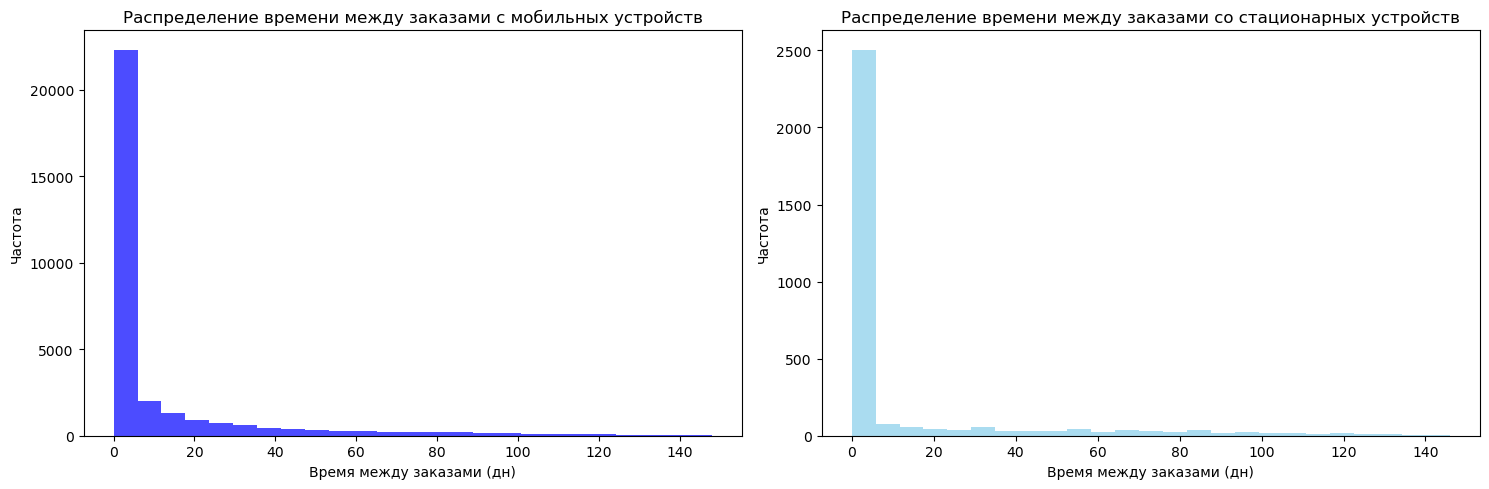

In [114]:
# Создаем фигуру и оси для двух подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Подграфик для мобильных устройств
ax1.hist(device_mobile['days_since_prev'], bins=25, color='blue', alpha=0.7)
ax1.set_xlabel('Время между заказами (дн)')
ax1.set_ylabel('Частота')
ax1.set_title('Распределение времени между заказами с мобильных устройств')


# Подграфик для стационарных устройств
ax2.hist(device_desktop['days_since_prev'], bins=25, color='skyblue', alpha=0.7)
ax2.set_xlabel('Время между заказами (дн)')
ax2.set_ylabel('Частота')
ax2.set_title('Распределение времени между заказами со стационарных устройств')


# Отображаем графику
plt.tight_layout()  # Уменьшаем пустое пространство между подграфиками
plt.show()

В данном случае на графиках также видно наличие "хвоста", а также основная часть данных сосредоточена между 0 и 20. Поэтому проверим сопоставимость дисперсий и применим `Test Anderson-Darling`.

In [115]:
dis_mobile = mobile_days['days_since_prev'].var()
dis_desktop = desktop_days['days_since_prev'].var()
print (f'Дисперсия времени между заказами с помощью мобильных устройств: {dis_mobile:.2f}')
print (f'Дисперсия времени между заказами с помощью стационарных устройств: {dis_desktop:.2f}')

Дисперсия времени между заказами с помощью мобильных устройств: 933.96
Дисперсия времени между заказами с помощью стационарных устройств: 1416.20


Дополнительно проведем исследование о наличии или отсутствии нормального распределения данных в `days_since_prev`. Соответственно наша гипотеза звучит так: Данные о времени между заказами пользователей имеют не имеют нормального распределения.  Исходя из этого:

- `Нулевая гипотеза (H0)`: Данные о времени между заказами пользователей имеют нормальное распределение;
- `Альтернативная гипотеза (H1)`: Данные о времени между заказами пользователей имеют не имеют нормального распределения

In [116]:
result_mobile_days = anderson(mobile_days['days_since_prev'], dist='norm')
if result_mobile_days.statistic < max(result_mobile_days.critical_values):
    print("Гипотеза H0 подтверждена:\nДанные в выборке о количестве заказов, сделанных с устройства имеют нормального распределения")
else:
    print("Гипотеза H1 принимается:\nДанные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения")

Гипотеза H1 принимается:
Данные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения


In [117]:
result_desktop_days = anderson(desktop_days['days_since_prev'], dist='norm')
if result_desktop_days.statistic < max(result_desktop_days.critical_values):
    print("Гипотеза H0 подтверждена:\nДанные о времени между заказами пользователей  имеют нормальное распределение")
else:
    print("Гипотеза H1 принимается:\nДанные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения")

Гипотеза H1 принимается:
Данные в выборке о количестве заказов, сделанных с устройства не имеют нормального распределения


По результатам проведенной проверки мы обнаружили аналогичные проблемы в данных, как и при исследовании заказов, поэтому стоит использовать `тест Манна-Уитни`.

Наша вторая гипотеза звучит так: **Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств. ** Соответственно нам необходимо определить выше ли среднее время между заказами через приложение по сравнению со стационарным устройством и является ли различие статистически значимым. Для этого сформируем нулевую и альтернативную гипотезу:

- `Нулевая гипотеза H₀`: Среднее время между заказами пользователей мобильного приложения не выше по сравнению с пользователями стационарных устройств.

- `Альтернативная гипотеза H₁`: Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств и различие статистически значимо.

In [118]:
##сформированные данные для теста
test_mobile_time = device_mobile['days_since_prev']
tesr_desktop_time= device_desktop['days_since_prev']

# Тест Манна-Уитни с односторонней гипотезой (альтернатива 'greater')
mw_test_time = mannwhitneyu(test_mobile_time, tesr_desktop_time, alternative='greater')

#статестический уровень значимости
alpha = 0.05

if mw_test_time.pvalue > alpha:
    print(f'pvalue={mw_test_time.pvalue} > {alpha}')
    print('Нулевая гипотеза подтверждается.\nСреднее время между заказами пользователей мобильного приложения не выше по сравнению с пользователями стационарных устройств.')
else:
    print(f'pvalue={mw_test_time.pvalue} < {alpha}')
    print('Принимаем альтернативную гипотезу.\nСреднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств .')

pvalue=6.083314043508919e-39 < 0.05
Принимаем альтернативную гипотезу.
Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств .


### Промежуточные выводы в рамках статистического анализа данных и проверка гипотез активности пользователей мобильных и стационарных устройств.

1. В данных было обнаружено множество пересечений среди пользователей, то есть ряд посетителей приобретал билеты с обоих устройства. Поэтому, для снижения вероятности искажения результатов теста было принято убрать пересекающихся пользователей;
2. Мы определили, что распределение данных по количеству заказов и времени между заказами не соответствует нормальному распределению, что подтверждено графическим анализом и тестом `Колмогорова-Смирнова`. В рамках статестического анализа применён `тест Манна-Уитни`, поскольку он не требует нормального распределения;
3. Проверка гипотез показала:
    - Первая гипотеза: `Среднее количество заказов на одного пользователя мобильного приложения выше, чем у пользователей стационарных устройств`. В результате статистического анализа мы можем определить, что  `p-value = 4.07×10⁻³⁹ << 0.05`, следовательно гипотеза подтверждена. Таким образом, пользователи мобильного приложения делают больше заказов, чем пользователи стационарных устройств;
    - Вторая гипотеза: `Среднее время между заказами пользователей мобильного приложения выше по сравнению с пользователями стационарных устройств` По результату теста гипотеза была подтверждена так как `p-value = 6.08×10⁻³⁹ << 0.05`, то есть с мобильных устройств делают заказы реже чем со стационарных компьютеров. Различие среднего времени между заказами с мобильного и стационарного устройства имеют статистическую значимость.
    
Таким образом, пользователи мобильных устройств делают больше заказов, но при этом делают это реже чем пользователи со стационарных устройств. Эти данные подтверждают важные различия в поведении пользователей мобильных и стационарных устройств, что следует учитывать при разработке маркетинговых стратегий и оптимизации функционала.   


## Общий вывод и рекомендации по проекту

### По результату проведенной работы мы можем сделать следующие  общие выводы.


Нам были представлены  данные о сервисе бронирования билетов `Яндекс.Афиша`. 

---
Предобработка данных:
- исходные данные представляли два датасета: один с количественными показателями о заказах, другой с информацией о мероприятиях, а также вспомогательная информация о курсах валют;
- во время предобработки были выявлены и обработаны пропущенные значения, удалены дубликаты и аномальные значения;
- оптимизированы типы данных, созданы дополнительные признаки (такие как доход в рублях, средняя стоимость билета, месяц и сезон).
- важным моментом исследования является предобработка аномальных значений в данных, так как они могут значительно искажать информацию, и в результате  обработки нами были удалены аномальные значения согласно исследованию в `revenue`  и `tickets_count`;
- в результате обработки данных нами были утрачены  `1,13%` данных, что является достаточно небольшим результатом в рамках исследования.

Сезонность и активность пользователей: 
- в осенний сезон прослеживается значительное увеличение объемов заказов и выручки по сравнению с летом, при этом показатель увеличился с `34147` заказов до  `99219 заказов в октябре`;
- основная масса покупателей предпочитает мобильное приложение (`около 80%`), эта тенденция сохраняется и в осенний период;
- в осеннем сезоне увеличивается спрос на семейные мероприятия и падает интерес к контенту категории 18+, демонстрируя переход к семейному отдыху.

Географическое распределение:
- лидирующие позиции среди регионов по количеству заказов и выручке занимают `Каменевский регион` и `Североярская область`,  на которые приходится `свыше 40%`  всех проводимых мероприятий и более `46% ` общего объема заказов, а также `52,25%`  всей выручки сервиса;
- остальные регионы слабо представлены, что создаёт риск избыточной зависимости от немногих рынков.

Деятельность организаторов:
- ни один организатор не получает весомую долю выручки, распределение неравномерно;
- лидеры по количеству заказов и выручке отличаются: организатор №4054 лидирует по выручке, организатор №1531 — по количеству заказов.

Результаты статистического анализа показали:
- что распределения по количеству заказов и промежутков между заказами не подчиняются нормальному закону распределения. Это подтверждено визуально графиками и статистически методом Колмогорова-Смирнова. Следовательно, мы использовали критерий Манна-Уитни для сравнения средних величин;
-  Гипотеза 1: Средний объём заказов пользователей мобильного приложения выше, чем у пользователей стационарных устройств. По результату теста Манна-Уитни мы получили `p-value = 4.07×10⁻³⁹ << 0.05`. Следовательно, гипотеза подтвердилась, что в среднем пользователи мобильного приложения делают больше заказов, чем пользователи стационарных устройств.
- Гипотеза 2: Среднее время между заказами пользователей мобильного приложения больше, чем у пользователей стационарных устройств. Здесь мы также применяли теста Манна-Уитни, так как данные не подчиняются нормальному закону распределения `pvalue=6.083314043508919e-39`, что меньше уровня значимости 0,05. Следовательно, гипотеза подтвердилась, что среднее время между заказом пользователя мобильной версии выше, чем заказ со стационарного компьютера.

 ###  Рекомендации по улучшению сервиса:

1. **Развитие мобильной версии сервиса.** - улучшить функционал мобильного приложения, ускорить интерфейс и повысить удобство использования.
2. **Разделение маркетинговых кампаний по регионам.** - необходимо развивать региональную политику продвижения сервиса, учитывая локальные предпочтения запросы аудитории каждого региона.
3. **Оптимизировать работу с организаторами мероприятий.** - индивидуализировать подход к крупным организаторам, стимулировать их активность.
4. **Повышать долю мероприятий для семейного досуга.** - расширять количество мероприятий с меньшей возрастной категорией, так как мы наблюдаем рост доли семейных мероприятий осенью, поэтому стоит целенаправленно продвигать соответствующие акции и спец предложения.
5. **Пересмотр ценовой политики сервиса.** - внедрить динамическое ценообразование, адаптированное к сезонным особенностям.
6. **Рекомендационные системы сервиса.**  - создать персонализированную систему рекомендаций, основанную на истории покупок и интересах пользователей.

Реализация предложенных инициатив позволит повысить лояльность пользователей, увеличить объемы продаж и расширить географию присутствия сервиса Яндекс.Афиша.
